# Introduction

## Research Proposal

Political opinions and leanings of different Americans can be shaped by a multitude of different factors, both visible and psychological, of which many may seem intangible and immeasurable. Income and age are two of the most easily measured and concrete variables that could potentially inform an American’s political leanings and more subtle opinions. 

When it comes to generalizing political leanings, one of the most popular dinner party sayings is often attributed to Winston Churchill: “If you are not a liberal when you are young, you have no heart, and if you are not a conservative when you are old, you have no brain.” Similarly, income has been explored by multiple entities throughout the past few years (The Atlantic, Forbes, NPR, Pew Research Center) on how income affects political leanings. 


### Who Might Use This Data

This analysis of data should be used by political advocacy groups, their funding departments, campaign managers, and social media marketing managers and other relevant personnel. These entities can consider this analysis as a piece of data-informed evidence on how to conduct their campaigns, which demographics to target and how, and which issues to address and speak to, based on how this survey sample of Americans leans towards different opinions and political self-identifications based on their age and income.

### The Data

This particular data set is just one month of data, from October 2017, of a survey series conducted monthly, called “The Pulse of the Nation”, by an entity called “Cards Against Humanity Saves America”. If this sounds familiar, it’s because “Cards Against Humanity” is the increasingly popular risque card game played by many Americans, which touches on subjects that many Americans think about but wouldn’t dare to address publicly. 

Their survey each month includes questions along the same vein. Even their own website, where much of the data is compiled and analyzed, calls to the unorthodox questions of social scientists and data analysts by saying: “Are you a social scientist or academic who studies public opinion? Want to ask Americans something that no funding agency or internal review board would approve in a million years? Maybe we can help!” This data is special because it asks unorthodox questions, in addition to more normal questions, such as “Have you ever eaten a kale salad?” and more, that could in time lead to interesting connections between political affiliations and cultural trends, which could help inform political activist groups how to connect these demographics in an authentic way that is deeper than just political affiliation, but instead by cultural trends and lifestyles. 

This survey series received funding for a year, brom September 2017 through August 2018, during a US presidential term that could be described as volatile at best. The dataset on the popular website “Kaggle”  can be found at the following link: 

https://www.kaggle.com/cardsagainsthumanity/pulse-of-the-nation?select=201711-CAH_PulseOfTheNation.csv 


### Research Questions and Hypotheses

The big question here we are trying to answer is: how does income and age affect opinions and political leanings? While this big question can (and should) be explored through data as widely as possible, the first step is through this one data set with the following questions: 

“How does income level and age affect…”

1.   Whether or not one mostly agrees or mostly disagrees with the beliefs of white nationalists?
2.   Whether or not one believes that government policies should help those who are poor and struggling in America?
3.   Whether or not one believes that most white people in America are racist?
4.   Whether or not one approves or disapproves of how Donald Trump is handling his job as president?
5.   Whether or not one is more likely to identify as a republican, democrat, or independent? 
6.   Whether or not one has ever eaten a kale salad, if only for comedic relief. 

**Hypotheses**

In each of these cases, the null hypotheses are that there is no difference between the general income level and age for these differences in opinion or beliefs. 

**H0:** 	*There is no difference between the distribution of income level and/ or age for the opinion/belief in question*

**Ha:**	*There is a difference between the distribution of income level and/or age for the opinion/belief in question. *


### Methods of Analysis

The null hypothesis will either be rejected or accepted for each question, by examining the distribution visually, testing for normality with a Shapiro-Wilks test if it is not clear after visual examination, and using whatever appropriate statistical testing methods for independent samples based on either normal or non-normal distributions to decide whether the distributions see any differences when divided by these measures. 

Often times we will be testing for differences between more than two independent groups, for which we will use a the One-Way ANOVA test and subsequently Tukey’s Honest Significant Differences Test if the data is distributed normally, and using a median test and a Kruskal-Willis test of the data is not distributed normally. 

# Acquiring and Cleaning the Data


In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns 
sns.set()

In [ ]:
from google.colab import files

In [ ]:
url = 'https://raw.githubusercontent.com/meeshmg/ThinkfulCapstone1/main/201710-CAH_PulseOfTheNation.csv'
pulse_data = pd.read_csv(url)

In [ ]:
# Taking a first look at the data

pulse_data.head()

,Income,Gender,Age,Age Range,Political Affiliation,Do you approve or disapprove of how Donald Trump is handling his job as president?,What is your highest level of education?,Q6OTH1,What is your race?,Q5OTH1,"From what you have heard or seen, do you mostly agree or mostly disagree with the beliefs of White Nationalists?","If you had to guess, what percentage of Republicans would say that they mostly agree with the beliefs of White Nationalists?",q8x,Would you say that you love America?,"If you had to guess, what percentage of Democrats would say that they love America?",q10x,Do you think that government policies should help those who are poor and struggling in America?,"If you had to guess, what percentage of Republicans would say yes to that question?",Do you think that most white people in America are racist?,"If you had to guess, what percentage of Democrats would say yes to that question?",Have you lost any friendships or other relationships as a result of the 2016 presidential election?,Do you think it is likely or unlikely that there will be a Civil War in the United States within the next decade?,Have you ever gone hunting?,Have you ever eaten a kale salad?,"If Dwayne ""The Rock"" Johnson ran for president as a candidate for your political party, would you vote for him?","Who would you prefer as president of the United States, Darth Vader or Donald Trump?"
0,192000.0,Female,35,35-44,Strong Republican,DK/REF,College degree,NaN,White,NaN,DK/REF,NaN,DK/REF,Yes,40.0,NaN,Yes,75.0,No,50.0,No,Unlikely,No,No,No,Donald Trump
1,54000.0,Female,58,55-64,Independent,Disapprove,Some college,NaN,White,NaN,DK/REF,NaN,DK/REF,Yes,80.0,NaN,Yes,90.0,No,50.0,No,Likely,No,No,Yes,Darth Vader
2,20000.0,Male,50,45-54,Not Strong Democrat,Approve,Other,7th grade,White,NaN,Agree,10.0,NaN,Yes,60.0,NaN,Yes,50.0,Yes,30.0,No,Likely,Yes,No,Yes,Donald Trump
3,21000.0,Female,40,35-44,Independent,Disapprove,College degree,NaN,White,NaN,DK/REF,NaN,DK/REF,Yes,30.0,NaN,Yes,50.0,Yes,35.0,No,Likely,No,Yes,No,Darth Vader
4,164000.0,Female,42,35-44,Strong Democrat,DK/REF,Graduate degree,NaN,Black,NaN,DK/REF,NaN,DK/REF,Yes,NaN,DK/REF,Yes,0.0,DK/REF,0.0,No,Unlikely,No,Yes,Yes,Darth Vader


In [ ]:
pulse_data.shape

(1000, 26)

In [ ]:
# Taking a look at the size and info of our data set, including any null values.

pulse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                        --------------  -----  
 0   Income                                                                                                                        300 non-null    float64
 1   Gender                                                                                                                        1000 non-null   object 
 2   Age                                                                                                                           1000 non-null   int64  
 3   Age Range                                                                                                         

In taking a first look at this set of data, it's clear that we have to wittle down the data quite a bit, as there are only 3000 participants of the 1000 surveyed who chose to report their income. Considering income is on of our major comparison variables, along with age, we must exclude all the records in which the income is not reported. This leaves us with 300 records total, which is quite a bit smaller than the initial data set. Within sub groups of these 300 records, the smallest will not likely drop below 50, which is the minimum number of records we could still work with. Even so, the results of this analysis will unlikely be highly trustworthy, and more surveys should be taken and analyzed again.

In [ ]:
# Choosing a subset of the data only in which income is not null. 

pulse_data_income = pulse_data.dropna(axis=0, subset=['Income'])

In [ ]:
# Dropping the columns of questions that will not be analyzed, or have null values. 
# Upon inspection of the data "DK/REF" is shorthand for "Don't know" or "Refused to Answer" and we will keep this as an acceptable response. 

pulse_select_data = pulse_data_income.drop(pulse_data_income.columns[[3,7,9,11,12,14,15,17,19,20,22,25]], axis=1)

In [ ]:
# Let's look at our new data

pulse_select_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 676
Data columns (total 14 columns):
 #   Column                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                             --------------  -----  
 0   Income                                                                                                             300 non-null    float64
 1   Gender                                                                                                             300 non-null    object 
 2   Age                                                                                                                300 non-null    int64  
 3   Political Affiliation                                                                                              300 non-null    object 
 4   Do you approve or disappro

In [ ]:
# Indeed, there are 300 non-null values in every column. 

pulse_select_data.head()

,Income,Gender,Age,Political Affiliation,Do you approve or disapprove of how Donald Trump is handling his job as president?,What is your highest level of education?,What is your race?,"From what you have heard or seen, do you mostly agree or mostly disagree with the beliefs of White Nationalists?",Would you say that you love America?,Do you think that government policies should help those who are poor and struggling in America?,Do you think that most white people in America are racist?,Do you think it is likely or unlikely that there will be a Civil War in the United States within the next decade?,Have you ever eaten a kale salad?,"If Dwayne ""The Rock"" Johnson ran for president as a candidate for your political party, would you vote for him?"
0,192000.0,Female,35,Strong Republican,DK/REF,College degree,White,DK/REF,Yes,Yes,No,Unlikely,No,No
1,54000.0,Female,58,Independent,Disapprove,Some college,White,DK/REF,Yes,Yes,No,Likely,No,Yes
2,20000.0,Male,50,Not Strong Democrat,Approve,Other,White,Agree,Yes,Yes,Yes,Likely,No,Yes
3,21000.0,Female,40,Independent,Disapprove,College degree,White,DK/REF,Yes,Yes,Yes,Likely,Yes,No
4,164000.0,Female,42,Strong Democrat,DK/REF,Graduate degree,Black,DK/REF,Yes,Yes,DK/REF,Unlikely,Yes,Yes


In [ ]:
# Let's take a look at unique value counts for certain columns. 
# These answers provide too much variability so for simplicity we'll change Political Affiliation to one of three categories:
# Strong and Not Strong Republican will be changed to just Republican
# Strong and Not Strong Democrat will be changed to just Democrat
# Independent and DK/REF will be changed to Independent/Undecided.

pulse_select_data.iloc[:,3].value_counts()

Independent              100
Strong Democrat           82
Strong Republican         40
DK/REF                    30
Not Strong Democrat       26
Not Strong Republican     22
Name: Political Affiliation , dtype: int64

In [ ]:
# Taking a look at unique counts for this question, we'll change DK/REF to "Don't Know", just so it's easier to understand.

pulse_select_data.iloc[:,4].value_counts()

Disapprove    168
Approve       101
DK/REF         31
Name: Do you approve or disapprove of how Donald Trump is handling his job as president?, dtype: int64

In [ ]:
# Looking at Education Level, we'll change all these categories into two categories:
# College degree/ Graduate Degree will be combined
# High School/ Some college/ other will be combined.

pulse_select_data.iloc[:,5].value_counts()

College degree     87
High school        71
Graduate degree    71
Some college       64
Other               7
Name: What is your highest level of education?, dtype: int64

In [ ]:
# Looking at value counts for Race, We'll narrow down teh results to White, Black, Latino, and Asian/Other/No Answer

pulse_select_data.iloc[:,6].value_counts()

White     188
Black      50
Latino     41
DK/REF     11
Other       7
Asian       3
Name: What is your race?, dtype: int64

In [ ]:
# Here we'll change DK/REF to 'Don't Know', once again for readability.

pulse_select_data.iloc[:,9].value_counts()

Yes       254
No         38
DK/REF      8
Name: Do you think that government policies should help those who are poor and struggling in America?, dtype: int64

In [ ]:
# Here we'll change DK/REF to 'Don't Know', once again for readability.

pulse_select_data.iloc[:,10].value_counts()

No        235
Yes        56
DK/REF      9
Name: Do you think that most white people in America are racist?, dtype: int64

In [ ]:
# Replacing all the values previously discussed

pulse_select_data["Political Affiliation "].replace({"Independent": "Independent/Undecided", "DK/REF": "Independent/Undecided", "Strong Democrat": "Democrat", "Strong Republican": "Republican", "Not Strong Democrat": "Democrat", "Not Strong Republican": "Republican"}, inplace=True)
pulse_select_data['Do you approve or disapprove of how Donald Trump is handling his job as president?'].replace({"DK/REF": "Don't Know"}, inplace=True)
pulse_select_data['What is your highest level of education?'].replace({"College degree": "College/Graduate degree", "Graduate degree": "College/Graduate degree", "High school": "High school/Some college/ other", "Some college":"High school/Some college/ other", "Other": "High school/Some college/ other"}, inplace = True)
pulse_select_data['What is your race?'].replace({"DK/REF": "Asian/ other/ no answer", "Asian": "Asian/ other/ no answer", "Other": "Asian/ other/ no answer"}, inplace=True)
pulse_select_data['From what you have heard or seen, do you mostly agree or mostly disagree with the beliefs of White Nationalists?'].replace({"DK/REF":"Don't Know"}, inplace=True)
pulse_select_data['Do you think that government policies should help those who are poor and struggling in America?'].replace({"DK/REF":"Don't Know"},inplace=True)
pulse_select_data['Do you think that most white people in America are racist?'].replace({"DK/REF":"Don't Know"},inplace=True)
pulse_select_data['Have you ever eaten a kale salad?'].replace({"DK/REF": "Don't Know"},inplace=True)

In [ ]:
# Let's take a look at the new data

pulse_select_data.head()

,Income,Gender,Age,Political Affiliation,Do you approve or disapprove of how Donald Trump is handling his job as president?,What is your highest level of education?,What is your race?,"From what you have heard or seen, do you mostly agree or mostly disagree with the beliefs of White Nationalists?",Would you say that you love America?,Do you think that government policies should help those who are poor and struggling in America?,Do you think that most white people in America are racist?,Do you think it is likely or unlikely that there will be a Civil War in the United States within the next decade?,Have you ever eaten a kale salad?,"If Dwayne ""The Rock"" Johnson ran for president as a candidate for your political party, would you vote for him?"
0,192000.0,Female,35,Republican,Don't Know,College/Graduate degree,White,Don't Know,Yes,Yes,No,Unlikely,No,No
1,54000.0,Female,58,Independent/Undecided,Disapprove,High school/Some college/ other,White,Don't Know,Yes,Yes,No,Likely,No,Yes
2,20000.0,Male,50,Democrat,Approve,High school/Some college/ other,White,Agree,Yes,Yes,Yes,Likely,No,Yes
3,21000.0,Female,40,Independent/Undecided,Disapprove,College/Graduate degree,White,Don't Know,Yes,Yes,Yes,Likely,Yes,No
4,164000.0,Female,42,Democrat,Don't Know,College/Graduate degree,Black,Don't Know,Yes,Yes,Don't Know,Unlikely,Yes,Yes


# Data Analysis

## A Brief Look at the General Distribution of Income and Age

Let's look first at the general distribution and range of both income and age.

In [ ]:
income_levels = pulse_select_data['Income'].sort_values(ascending=False)
highest_income = income_levels.head(1).values[0]
lowest_income = income_levels.tail(1).values[0]
print(f'The highest income of the survey participants was ${highest_income.round(0)}')
print(f'The lowest income of the survey participants was ${lowest_income.round(0)}')


The highest income of the survey participants was $401000.0
The lowest income of the survey participants was $5000.0


It appears the highest income of those surveyed was 401,000 USD and the lowest was 5,000 USD. It's clear we've gotten the lower end of the spectrum for income in the United States, however there is a good portion of earners in the US who make more than $400,000. In expanding this survey in the future I'd ceratinly aim to gather opinions from earners in the US that fall in the upper 10% of earners. 

The distribution looks like this:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

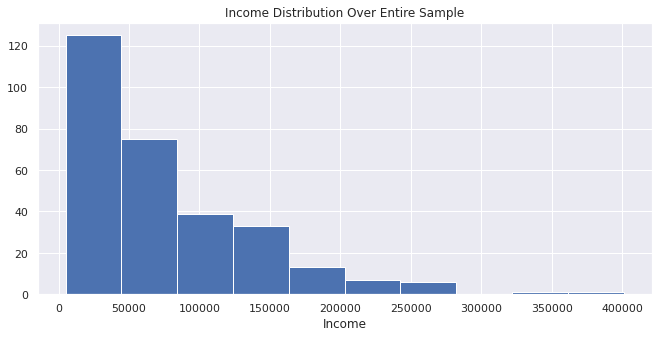

In [ ]:
income_dist = plt.figure(figsize=(11,5))
plt.hist(pulse_select_data['Income'])
plt.xlabel('Income')
plt.title('Income Distribution Over Entire Sample')
income_dist.show()

income_dist.savefig('samplefigure.png')
files.download('samplefigure.png')

It appears that more people surveyed made less than 50,000, while significantly less made $100,000 or more. 

Now let's examine the range of ages of those surveyed.

In [ ]:
ages = pulse_select_data['Age'].sort_values(ascending=False)
oldest_person = ages.head(1).values[0]
youngest_person = ages.tail(1).values[0]
print(f'The oldest person of the survey participants was {oldest_person} years old')
print(f'The youngest person of the survey participants was {youngest_person} years old')

The oldest person of the survey participants was 99 years old
The youngest person of the survey participants was 18 years old


This is a great age range! We've hopefully gotten many different perspectives.

Text(0.5, 1.0, 'Age Distribution Over Entire Sample')

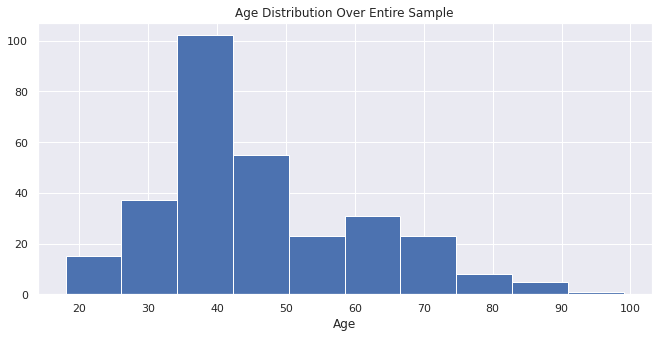

In [ ]:
plt.figure(figsize=(11,5))
plt.hist(pulse_select_data['Age'])
plt.xlabel('Age')
plt.title('Age Distribution Over Entire Sample')

## Analysis of Survey Questions

### 1. From what you have heard or seen, do you mostly agree or mostly disagree with the beliefs of White Nationalists?

#### **Separating Data into Groups**

In [ ]:
# Separating out the data into groups: Those who agree with white Nationalists and those who do not.

agree_white_nats = pulse_select_data[pulse_select_data['From what you have heard or seen, do you mostly agree or mostly disagree with the beliefs of White Nationalists?'] == 'Agree']
disagree_white_nats = pulse_select_data[pulse_select_data['From what you have heard or seen, do you mostly agree or mostly disagree with the beliefs of White Nationalists?'] == 'Disagree']

First let's take a look at the data for income and age for both of these groups.

In [ ]:
agree_white_nats.describe()

,Income,Age
count,29.000000,29.000000
mean,38482.758621,46.793103
std,27109.066340,16.967152
min,5000.000000,18.000000
25%,9000.000000,35.000000
50%,35000.000000,42.000000
75%,62000.000000,55.000000
max,87000.000000,83.000000


In [ ]:
disagree_white_nats.describe()

,Income,Age
count,213.000000,213.000000
mean,80244.131455,46.596244
std,67636.908855,14.778120
min,5000.000000,18.000000
25%,30000.000000,37.000000
50%,56000.000000,42.000000
75%,121000.000000,57.000000
max,401000.000000,99.000000


There's clearly many MORE of the survey participants who DISAGREE with white nationalists. Although at first glance the mean income is much lower, but this might not mean anything considering it is unlikely it will be normally distributed. Let's look at the distributions for both Income and Age and perform a statistical test. 

#### **Income**

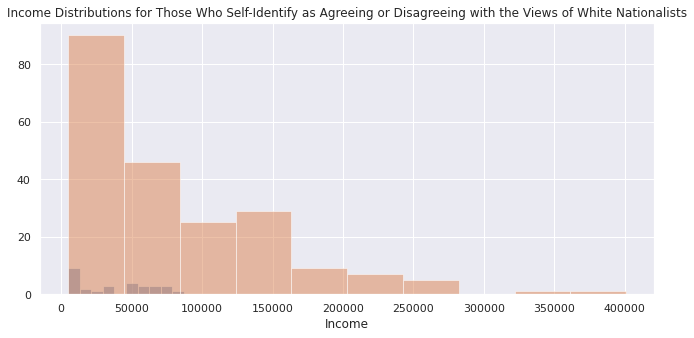

In [ ]:
# Let's look at these distributions based on income. 

plt.figure(figsize=(11,5))
plt.hist(agree_white_nats['Income'], alpha = .5)
plt.hist(disagree_white_nats['Income'], alpha = .5)
plt.xlabel('Income')
plt.title('Income Distributions for Those Who Self-Identify as Agreeing or Disagreeing with the Views of White Nationalists')
plt.show()

It appears that MANY more people identify as disagreeing with white Nationalists over most incomes than those who agree. Though it does appear perhaps that those who say they agree may have a lower income.

This is absolutely NOT normally distributed, and we are comparing two independent groups, so we will use the Kruskal-Wallis Test for non-parametric distributions. 

**Let's also take a look at the box plot**

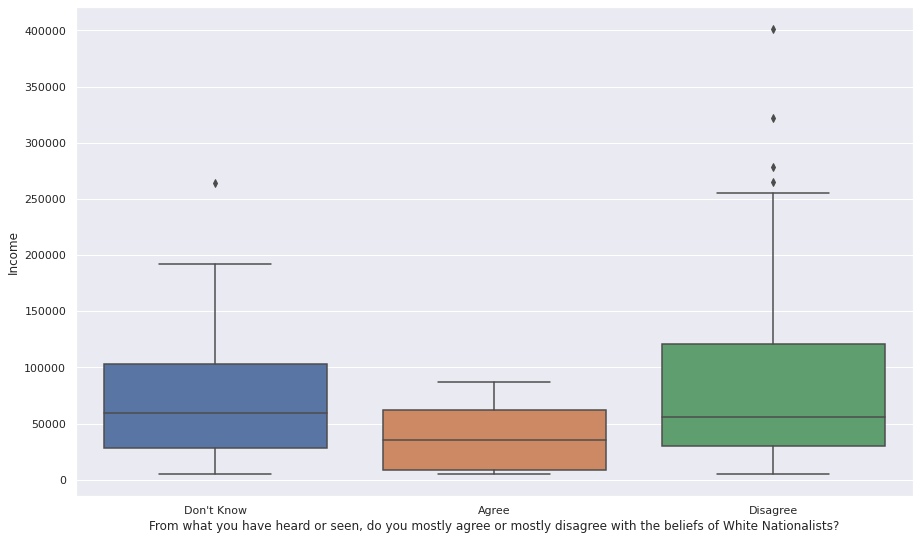

In [ ]:
plt.figure(figsize=(15,9))
sns.boxplot(x=pulse_select_data['From what you have heard or seen, do you mostly agree or mostly disagree with the beliefs of White Nationalists?'],y=pulse_select_data['Income'])

Based upon visual inspection, it does appear to me that the median income for those who disagree might be a bit higher, but we'll see what the statistical tests say. Even so, it's very clear that the upper quartile for those who disagree is MUCH higher than those who disagree, so regardless of what the statistical tests say, we could say that the range of Income for those who disagree with the views of white nationalists is MUCH larger, with a much higher maximum although a similar minimum, whereas the range of income for those who disagree is much smaller, with a much lower maximum although a similar minimum. 

**Kruskal-Wallis Test**

In [ ]:
stats.kruskal(agree_white_nats['Income'], disagree_white_nats['Income'])

KruskalResult(statistic=11.427613841080918, pvalue=0.0007236055567516745)

Interesting! Looking at the p-value, as it is less than 0.05, the data seems to suggest that there is a difference in the income distribution between those who identify as agreeing with the views of white nationalists and those who identify in disagreeing with the views of white nationalists. 

We'll do a median test as further analysis.

**Mood's Median Test**

In [ ]:
stat, p, med, tbl = stats.median_test(agree_white_nats['Income'],disagree_white_nats['Income'])

In [ ]:
print(f'Our p-value for the median test here is {p}, and our grand median is {med}.')

Our p-value for the median test here is 0.1365419583787483, and our grand median is 53000.0.


Although our p-value for the Kruskal-Wallis test was less than alpha = 0.05, upon further analysis with Mood's Median Test, we found a test statistic of 0.1365, which does not provide enough evidence to allow us to reject the null hypothesis that there is no difference in income levels between those who agree with white nationalists and those who do not. 

**Here we fail to reject the null hypothesis.**

#### **Age**

Let's look at any differences in age distribution.

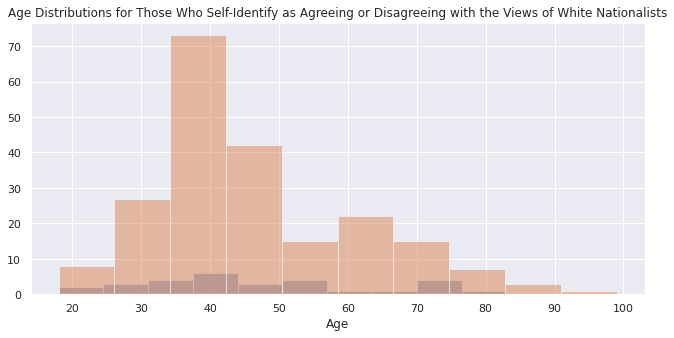

In [ ]:
plt.figure(figsize=(11,5))
plt.hist(agree_white_nats['Age'], alpha = .5)
plt.hist(disagree_white_nats['Age'], alpha = .5)
plt.xlabel('Age')
plt.title('Age Distributions for Those Who Self-Identify as Agreeing or Disagreeing with the Views of White Nationalists')
plt.show()

These might actually be normally distributed, so let's formally test for normality.

In [ ]:
print(stats.describe(agree_white_nats['Age']))
print(stats.describe(disagree_white_nats['Age']))

DescribeResult(nobs=29, minmax=(18, 83), mean=46.793103448275865, variance=287.88423645320194, skewness=0.3193518245728524, kurtosis=-0.6683514093301115)
DescribeResult(nobs=213, minmax=(18, 99), mean=46.5962441314554, variance=218.39281601559037, skewness=0.8575150711402625, kurtosis=0.3629173889352968)


It looks as if based on skewness and kurtosis that these distributions might be normal. Let's check with a Shapiro-Wilks test.

In [ ]:
print(stats.shapiro(agree_white_nats['Age']))
print(stats.shapiro(disagree_white_nats['Age']))

(0.9679853320121765, 0.5064138174057007)
(0.9263380169868469, 7.602651841409624e-09)


Alas, our hopes for normality are dashed. Although it appears that perhaps the first distribution (that of the income of those who agree with white nationalists) may be normal, in that the test statistic is close to 1 and the p-value is above 0.5, it appears that the second is not, considering that the p-value being almost zero indicates non-normality whith in a 95% confidence interval.

Therefore, we will use non-parametric statistical tests, namely, the Kruskal-Wallis and the Mood's Median Test once again. 

Let's also look at a box plot for this data.

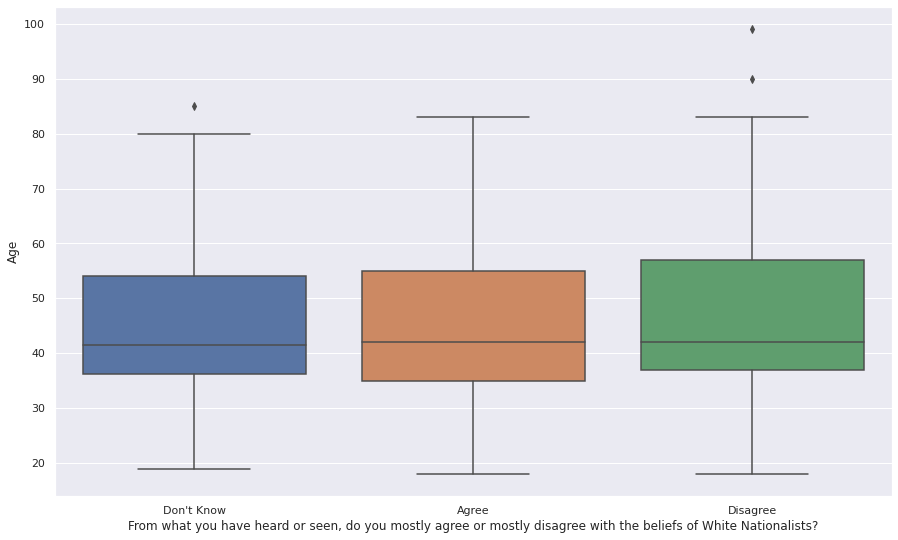

In [ ]:
plt.figure(figsize=(15,9))
sns.boxplot(x=pulse_select_data['From what you have heard or seen, do you mostly agree or mostly disagree with the beliefs of White Nationalists?'],y=pulse_select_data['Age'])

All three box plots for this data look very similar. I suspect we will fail to reject the null hypothesis based on these statistical tests.

**Kruskal-Wallis Test**

In [ ]:
stats.kruskal(agree_white_nats['Age'], disagree_white_nats['Age'])

KruskalResult(statistic=0.010664876886412582, pvalue=0.9177479778472055)

Already we can see that the p=value is much higher than 0.05, and therefore another test is not necessary.

**We once again fail to reject the null hypothesis that there is any meaningful age difference between those who agree with white nationalists and those who do not agree with white nationalists within this sample.**

In [ ]:
agree_percentage = agree_white_nats.shape[0] / pulse_select_data.shape[0]
agree_percentage

0.09666666666666666

Even so, it appears that almost 10% of those surveyed identify as agreeing with the views of white nationalists, which perhaps still feels uncomfortably high. 

### 2. Do you think that government policies should help those who are poor and struggling in America?

#### **Separating the Data into Groups**

In [ ]:
help_poor_people = pulse_select_data[pulse_select_data['Do you think that government policies should help those who are poor and struggling in America?'] == 'Yes']
dont_help_poor_people = pulse_select_data[pulse_select_data['Do you think that government policies should help those who are poor and struggling in America?'] == 'No']

Let's look at descriptions of this data for both Income and Age for both groups:

In [ ]:
help_poor_people.describe()

,Income,Age
count,254.000000,254.000000
mean,72578.740157,45.811024
std,63073.767127,14.594781
min,5000.000000,18.000000
25%,27000.000000,36.000000
50%,53000.000000,42.000000
75%,102500.000000,54.750000
max,401000.000000,90.000000


In [ ]:
dont_help_poor_people.describe()

,Income,Age
count,38.000000,38.000000
mean,77315.789474,48.157895
std,54228.797208,16.132100
min,9000.000000,19.000000
25%,37000.000000,37.000000
50%,67500.000000,44.000000
75%,110500.000000,60.750000
max,236000.000000,82.000000


Much less people think that the government should not help poor people, but the means of income and age look relatively similar. Its possible that income and age has little to do with these distributions, lets formally test. 

#### **Income**

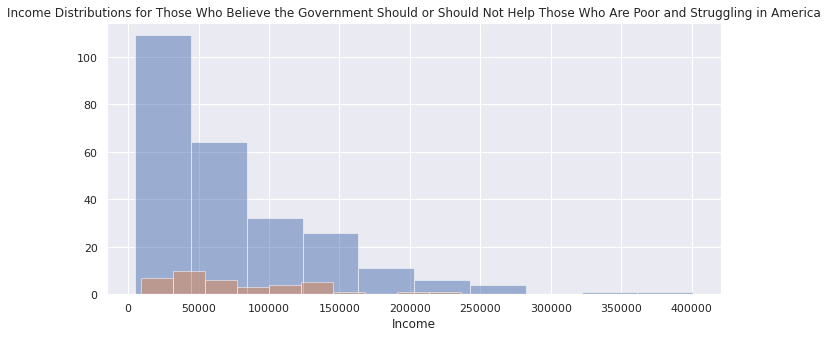

In [ ]:
plt.figure(figsize=(11,5))
plt.hist(help_poor_people['Income'], alpha = .5)
plt.hist(dont_help_poor_people['Income'], alpha = .5)
plt.xlabel('Income')
plt.title('Income Distributions for Those Who Believe the Government Should or Should Not Help Those Who Are Poor and Struggling in America')
plt.show()

This is clearly not normally distributed so we'll use the Kruskal-Wallis Test to determine if the distributions are any different.

Let's also look at a box plot:

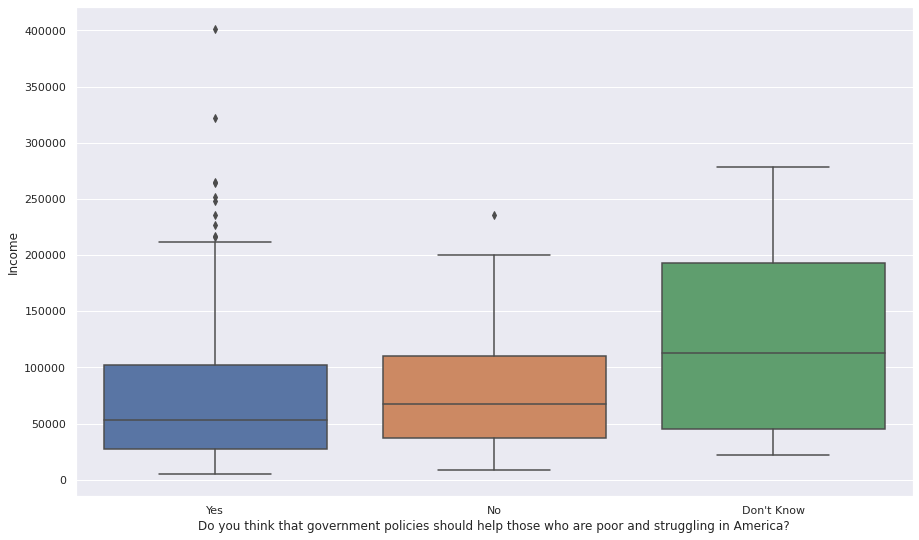

In [ ]:
plt.figure(figsize=(15,9))
sns.boxplot(x=pulse_select_data['Do you think that government policies should help those who are poor and struggling in America?'],y=pulse_select_data['Income'])

The box plots for Yes and No look quite similar. 

**Kruskal-Wallis**

In [ ]:
stats.kruskal(help_poor_people['Income'],dont_help_poor_people['Income'])

KruskalResult(statistic=1.0545888111872836, pvalue=0.3044526044719943)

Considering the p-value is ~0.3, which is much higher than 0.05, it appears that there is little evidence that would allow us to reject the null hypothesis that there is no difference between incomes of those who surveyed that government policies should people who are poor and struggling in the US. 

**We fail to reject the null hypothesis that there is any meaningful difference in income between those who believe that government policies should help those who are poor and struggling in the US and those who do not.**

#### **Age**

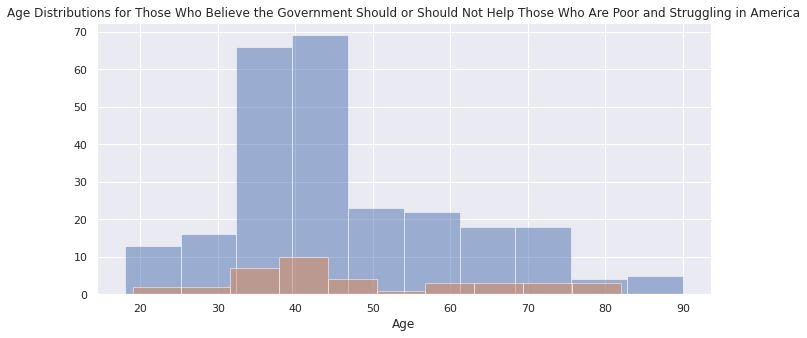

In [ ]:
plt.figure(figsize=(11,5))
plt.hist(help_poor_people['Age'], alpha = .5)
plt.hist(dont_help_poor_people['Age'], alpha = .5)
plt.xlabel('Age')
plt.title('Age Distributions for Those Who Believe the Government Should or Should Not Help Those Who Are Poor and Struggling in America')
plt.show()

Let's also look at a box plot. 

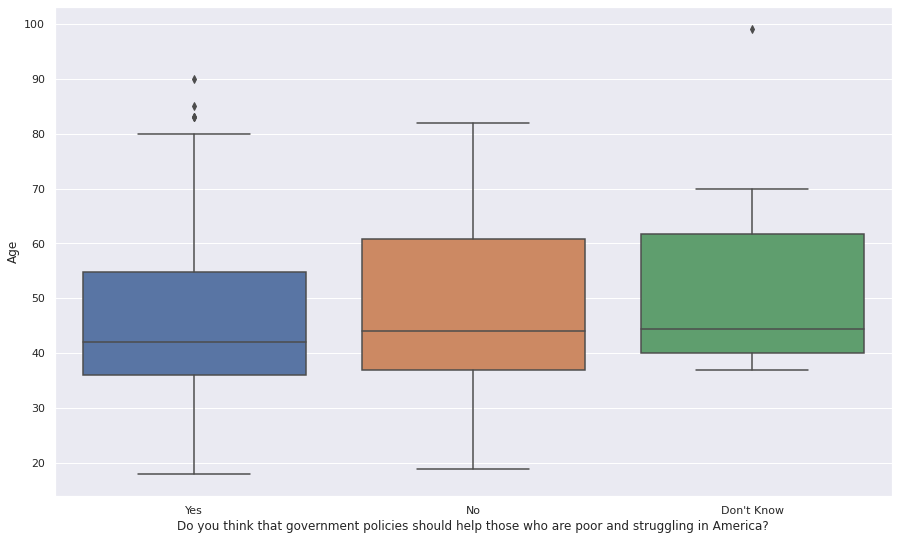

In [ ]:
plt.figure(figsize=(15,9))
sns.boxplot(x=pulse_select_data['Do you think that government policies should help those who are poor and struggling in America?'],y=pulse_select_data['Age'])

These box plots for Yes or No look quite similar with perhaps a SLIGHTLY higher median age for those who do not think that the government should hlpe those who are poor or struggling.

Let's test for normality.

In [ ]:
print(stats.describe(help_poor_people['Age']))
print(stats.describe(dont_help_poor_people['Age']))

DescribeResult(nobs=254, minmax=(18, 90), mean=45.811023622047244, variance=213.00762503501292, skewness=0.7133131508737574, kurtosis=0.03643296185939837)
DescribeResult(nobs=38, minmax=(19, 82), mean=48.1578947368421, variance=260.2446657183499, skewness=0.47641602283506546, kurtosis=-0.7838085207141767)


Values for skewness and kurtosis suggest normality. Let's check the Shapiro Wilks Test to be certain.

In [ ]:
print(stats.shapiro(help_poor_people['Age']))
print(stats.shapiro(dont_help_poor_people['Age']))

(0.9393529891967773, 9.79036052228821e-09)
(0.940896213054657, 0.044795919209718704)


Both p-values are lower than 0.5, so these distributions are non-normal within a 95% confidence interval. We'll use a Kruskal-Wallis test again to differentiate between these two groups.

**Kruskal-Wallis**

In [ ]:
stats.kruskal(help_poor_people['Age'], dont_help_poor_people['Age'])

KruskalResult(statistic=0.5894953112219098, pvalue=0.4426143451155501)

Given that the p-value is .44, much larger than 0.05, we'll determine that there is not enough evidence to reject the null hypothesis.

**We once again fail to reject the null hypothesis that there is any meaningful difference in age between those who believe that government policies should help those who are poor and struggling in the US and those who do not.**

### 3. Do you think that most white people in America are racist?

#### **Separating the Data into Groups**

In [ ]:
whites_are_racist = pulse_select_data[pulse_select_data['Do you think that most white people in America are racist?'] == 'Yes']
whites_are_not_racist = pulse_select_data[pulse_select_data['Do you think that most white people in America are racist?'] == 'No']

Let's take a look at basic stats for these groups.

In [ ]:
whites_are_racist.describe()

,Income,Age
count,56.000000,56.000000
mean,55553.571429,48.107143
std,47354.339205,17.420655
min,5000.000000,18.000000
25%,24000.000000,35.750000
50%,43500.000000,45.500000
75%,68000.000000,63.250000
max,227000.000000,83.000000


In [ ]:
whites_are_not_racist.describe()

,Income,Age
count,235.000000,235.000000
mean,78548.936170,45.868085
std,66570.962948,14.341815
min,5000.000000,18.000000
25%,30000.000000,36.500000
50%,57000.000000,42.000000
75%,114000.000000,53.000000
max,401000.000000,99.000000


Certainly more people think that most people in the US do not believe that most whites are racist, but even upon first inpsection it does appear that these people have a higher average income and a higher max income. There does not appear to be any big difference in average age however.

#### **Income**

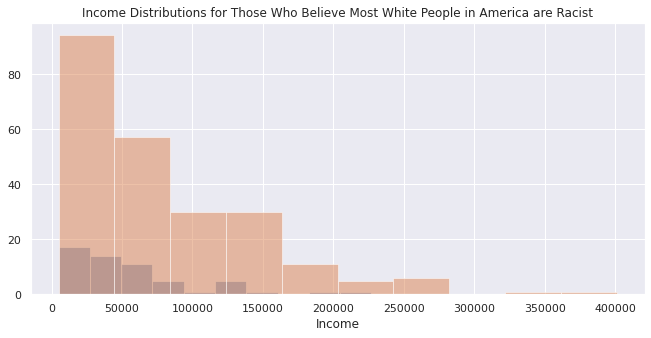

In [ ]:
# Plotting the distributions

plt.figure(figsize=(11,5))
plt.hist(whites_are_racist['Income'], alpha = .5)
plt.hist(whites_are_not_racist['Income'], alpha = .5)
plt.xlabel('Income')
plt.title('Income Distributions for Those Who Believe Most White People in America are Racist')
plt.show()

This is certainly NOT normal. Let's use the Kruskal-Wallis test to compare these two independent groups.

First lets look at a box plot of this data.

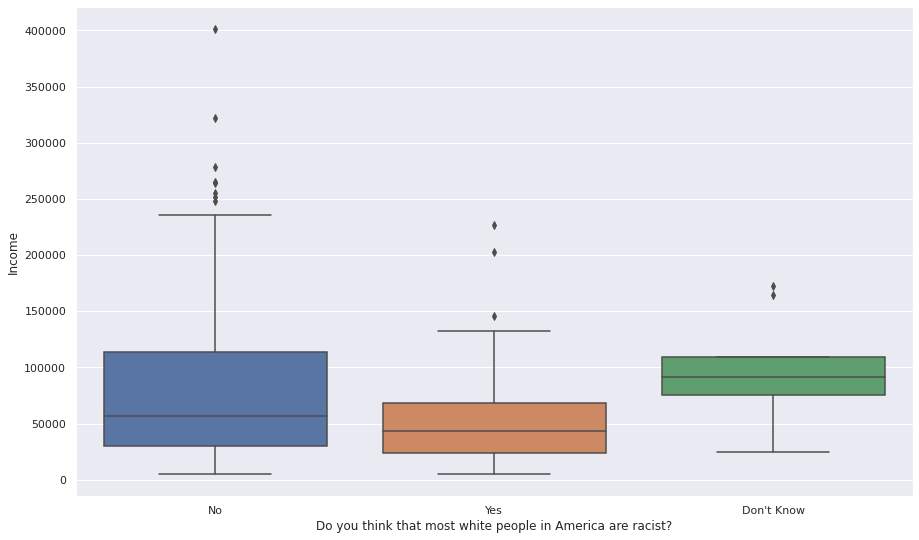

In [ ]:
plt.figure(figsize=(15,9))
sns.boxplot(x=pulse_select_data['Do you think that most white people in America are racist?'],y=pulse_select_data['Income'])

Indeed, whereas the minimum is about the same for both 'Yes' and 'No', the median, and upper quartiles of those who answered "No", as well as the outliers, fall at a much higher income.

**Kruskal-Wallis and Median Test**

In [ ]:
stats.kruskal(whites_are_racist['Income'],whites_are_not_racist['Income'])

KruskalResult(statistic=5.3556267226603165, pvalue=0.0206555092066449)

The p-value here, p=0.02, suggests a possible correlation. Let's use a median test to see if another test supports a distinction. 

In [ ]:
stats.median_test(whites_are_racist['Income'],whites_are_not_racist['Income'])

(4.848520526229265, 0.027669855609186618, 53000.0, array([[ 20, 125],
        [ 36, 110]]))

In [ ]:
import statistics
print(statistics.median(whites_are_racist['Income']))
print(statistics.median(whites_are_not_racist['Income']))

43500.0
57000.0


This is very interesting, it does appear that there is a difference in the groups supported by the p-values for both the Kruskal-Wallis Test and Mood's Median Test. 

**We reject the null hypothesis here, and say that evidence does support that there is a difference in income for those who believe that not all whites in the US are racist, in that the survey participants who answered this way will tend to have a higher income.**

**Let's explore why this may be.**


#### **Further Exploration on Income Differences**

I did notice in the data upon initial inspection of the DataFrame that it may be the case that more people who did not identify as white may hold the opinion that "all whites in the US are racist". I wonder if this difference in income between those who hold this opinion might have to do with a difference in income between racial groups of those surveyed. Let's look deeper. 

In [ ]:
white = pulse_select_data[pulse_select_data['What is your race?'] == 'White']
not_white = pulse_select_data[pulse_select_data['What is your race?'] != 'White']

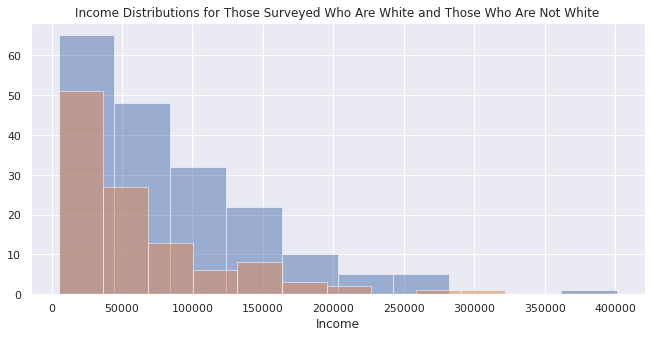

In [ ]:
plt.figure(figsize=(11,5))
plt.hist(white['Income'], alpha = .5)
plt.hist(not_white['Income'], alpha = .5)
plt.xlabel('Income')
plt.title('Income Distributions for Those Surveyed Who Are White and Those Who Are Not White')
plt.show()

In [ ]:
stats.kruskal(white['Income'],not_white['Income'])

KruskalResult(statistic=12.682973525946478, pvalue=0.0003690002878637396)

In [ ]:
stats.median_test(white['Income'],not_white['Income'])

(8.381226095695435, 0.0037911658345759973, 55000.0, array([[106,  43],
        [ 82,  69]]))

In [ ]:
print(statistics.median(white['Income']))
print(statistics.median(not_white['Income']))

62500.0
40000.0


This is very interesting. 

The Kruskal-Wallis Test and Mood's Median Test suggested that *those who believe most whites in the US are racist* in general have a *lower income* than those who do not believe that most whites in the US are racist. 

The Kruskal-Wallis Test and Mood's Median Test also support that there is a difference in Income between those surveyed who are white and those surveyed who are not white. In general, *those surveyed who are white* have a *higher income* than those surveyed who are not white. 

It's possible that the difference in Income distributions for the belief of whether or not those surveyed who identify as white in the US are racist is ***informed by the differences in Income*** for those surveyed who are white and those surveyed who are not white. 

In brief, it's possible that because the median income for those surveyed who are not white is lower than the median income for those surveyed who are white, and the median income is lower for those who believe that all whites in the US are racist than the median incoem for those who do not believe that all whites in the US are racist, perhaps one's belief on that topic is informed by ones identification as white or not white. 

*In essense, if you are not white, you are more likely to believe that all whites in the US are racist.*

**Let's look at some percentages on this topic.** 

In [ ]:
pulse_select_data['Do you think that most white people in America are racist?'].value_counts()

No            235
Yes            56
Don't Know      9
Name: Do you think that most white people in America are racist?, dtype: int64

In [ ]:
# Creating a pivot table based on the answer to this question comparied to one's race. 
by_race = pulse_select_data.pivot_table(columns=pulse_select_data['Do you think that most white people in America are racist?'],index= pulse_select_data['What is your race?'], aggfunc='size')
by_race

Do you think that most white people in America are racist?,Don't Know,No,Yes
What is your race?,,,
Asian/ other/ no answer,1,13,7
Black,2,34,14
Latino,1,28,12
White,5,160,23


In [ ]:
# Calculating percentages
black_yes_perc = by_race['Yes'][1] / pulse_select_data['What is your race?'].value_counts()[1] * 100
latino_yes_perc = by_race['Yes'][2] / pulse_select_data['What is your race?'].value_counts()[2] * 100
white_yes_perc = by_race['Yes'][3] / pulse_select_data['What is your race?'].value_counts()[0] * 100
print(f'{black_yes_perc.round(2)}% of Black Americans surveyed believe that most whites in the US are racist')
print(f'{latino_yes_perc.round(2)}% of Latino Americans surveyed believe that most whites in the US are racist')
print(f'{white_yes_perc.round(2)}% of White Americans surveyed believe that most whites in the US are racist')

28.0% of Black Americans surveyed believe that most whites in the US are racist
29.27% of Latino Americans surveyed believe that most whites in the US are racist
12.23% of White Americans surveyed believe that most whites in the US are racist


In [ ]:
# Creating a DataFrame with these percentages to create a bar graph. 
race_df = pd.DataFrame({'Race Self-Identification':['Black', 'Latino', 'White'], 'Percentage (%)':[black_yes_perc, latino_yes_perc, white_yes_perc]})

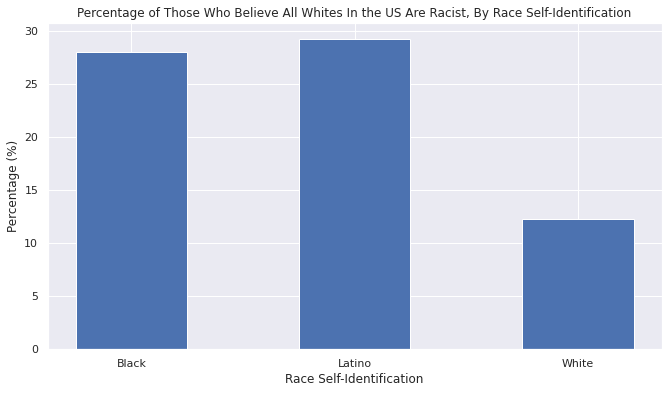

In [ ]:
plt.figure(figsize=(11,6))
plt.bar(x='Race Self-Identification', height='Percentage (%)', width=.5, data=race_df)
plt.xlabel('Race Self-Identification')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Those Who Believe All Whites In the US Are Racist, By Race Self-Identification')
plt.show()

Indeed, if someone is black or latino they are over twice as likely to believe that all whites in the US are racist. 

**Let's look at a couple final box plots to sum this up**

Text(0.5, 1.0, 'Income Differences for Those Who Believe All Whites are Racist vs. Those Who Do Not Believe All Whites are Racist')

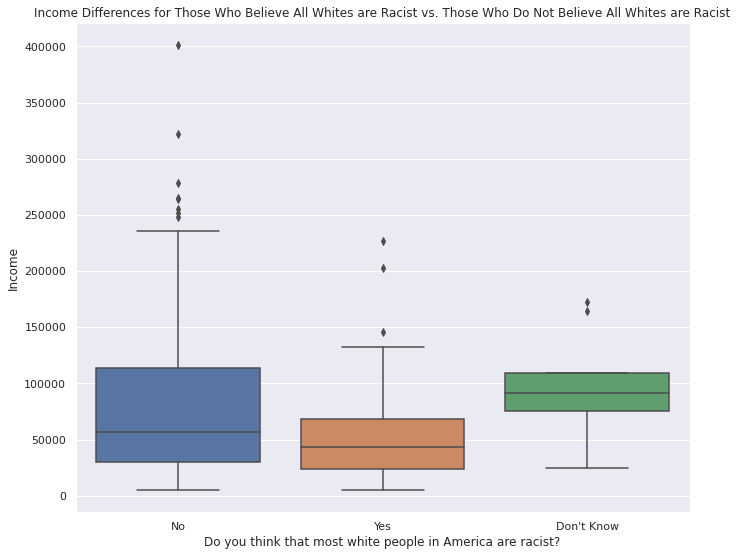

In [ ]:
plt.figure(figsize=(11,9))
sns.boxplot(y = 'Income', x = pulse_select_data['Do you think that most white people in America are racist?'], data = pulse_select_data)
plt.title('Income Differences for Those Who Believe All Whites are Racist vs. Those Who Do Not Believe All Whites are Racist')

We can see here, through this box plot shown before, that the median and max income for those who do not believe all whites in the US are racist is higher than those who do. 

Below is a box plot for income differences based on race. It is shown here that those surveyed who identify as white have a higher median and max income than thsoe who identified as black or latino. 

In [ ]:
plt.figure(figsize=(15,9))
sns.boxplot(y = 'Income', x = pulse_select_data['What is your race?'], data = pulse_select_data)
plt.title('Income Differences By Race Self-Identification')

It's clear even on this box plot that the median income for those who do believe that all whites in the US are racist is lower than those who do not. 

It's clear by the second box plot that those who identified as white have a higher median income than those who identified as black and latino. 

Perhaps the difference shown in the statistical test would be even more severe if we had excluded income from those who identified as Asian, other, or had no answer, as this group's median income surely brings up the median income for the category of "not white" that was established in order to test the income differences. 


#### **Age**

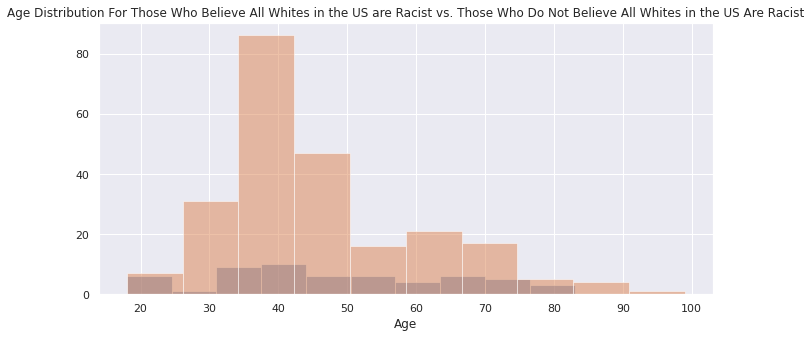

In [ ]:
plt.figure(figsize=(11,5))
plt.hist(whites_are_racist['Age'], alpha = .5)
plt.hist(whites_are_not_racist['Age'], alpha = .5)
plt.xlabel('Age')
plt.title('Age Distribution For Those Who Believe All Whites in the US are Racist vs. Those Who Do Not Believe All Whites in the US Are Racist')
plt.show()

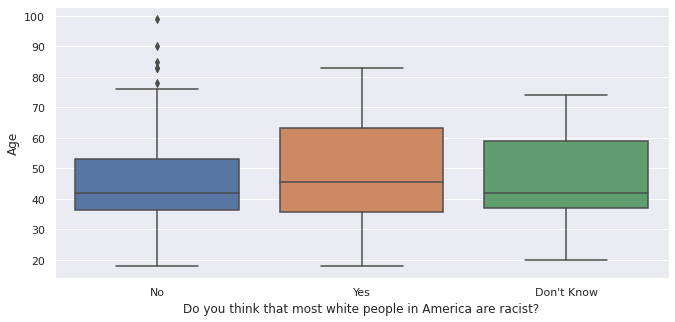

In [ ]:
plt.figure(figsize=(11,5))
sns.boxplot(x=pulse_select_data['Do you think that most white people in America are racist?'],y=pulse_select_data['Age'])

At first visual inspection, it doesn't look like there's much difference in age.

These may be normally distributed. Let's do some statistical tests to see. 

In [ ]:
print(stats.describe(whites_are_racist['Age']))
print(stats.describe(whites_are_not_racist['Age']))

DescribeResult(nobs=56, minmax=(18, 83), mean=48.107142857142854, variance=303.47922077922084, skewness=0.1241742345375731, kurtosis=-0.7773260043929273)
DescribeResult(nobs=235, minmax=(18, 99), mean=45.86808510638298, variance=205.68765230041828, skewness=1.0024923120404927, kurtosis=0.6599564487789125)


Based on skewness and kurtosis these may be normally distributed. Let's use a Shapiro-Wilks Test to see.

In [ ]:
print(stats.shapiro(whites_are_racist['Age']))
print(stats.shapiro(whites_are_racist['Age']))

(0.9702659845352173, 0.18075965344905853)
(0.9702659845352173, 0.18075965344905853)


Indeed, the Test Statistics are Close to 1, and the p-values are above 0.05, therefore both of these distributions can be describe as normal distributions. We will therefore use a parametric statistical test based on comparing two independent groups: A T-Test.

**Independent T-Test**

In [ ]:
stats.ttest_ind(whites_are_racist['Age'],whites_are_not_racist['Age'])

Ttest_indResult(statistic=1.005387673939592, pvalue=0.31555124924598027)

The p-value of this indpendent t-test is ~0.32, which is far above 0.05.

**We therefore fail to reject the null hypothesis that there is any difference in age for those who believe all whites in the US are racist and those who do not believe all whites in the US are racist.**

### 4. Do you approve or disapprove of how Donald Trump is handling his job as president?

#### **Separating the Data into Groups**

In [ ]:
# 4. Approve or Disapprove with Trump? 

approve = pulse_select_data[pulse_select_data['Do you approve or disapprove of how Donald Trump is handling his job as president?'] == 'Approve']
disapprove = pulse_select_data[pulse_select_data['Do you approve or disapprove of how Donald Trump is handling his job as president?'] == 'Disapprove']

Let's first take a look at the basic statistic info about the data.

In [ ]:
approve.describe()

,Income,Age
count,101.000000,101.000000
mean,83663.366337,44.643564
std,63898.087174,14.410124
min,5000.000000,18.000000
25%,38000.000000,35.000000
50%,67000.000000,42.000000
75%,118000.000000,48.000000
max,401000.000000,99.000000


In [ ]:
disapprove.describe()

,Income,Age
count,168.000000,168.000000
mean,67172.619048,47.440476
std,61698.222203,15.123722
min,5000.000000,18.000000
25%,23750.000000,37.000000
50%,43000.000000,43.000000
75%,97250.000000,58.250000
max,322000.000000,90.000000


At first glance there might end up being a big difference between income levels for those who Approve vs. those who Disapprove, though likely not different in age. 

#### **Income**

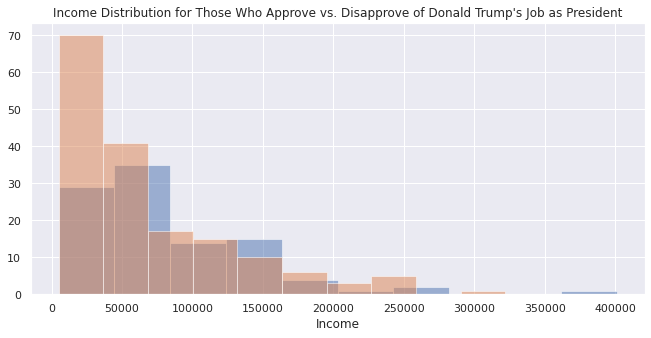

In [ ]:
plt.figure(figsize=(11,5))
plt.hist(approve['Income'], alpha = .5)
plt.hist(disapprove['Income'], alpha = .5)
plt.xlabel('Income')
plt.title("Income Distribution for Those Who Approve vs. Disapprove of Donald Trump's Job as President")
plt.show()

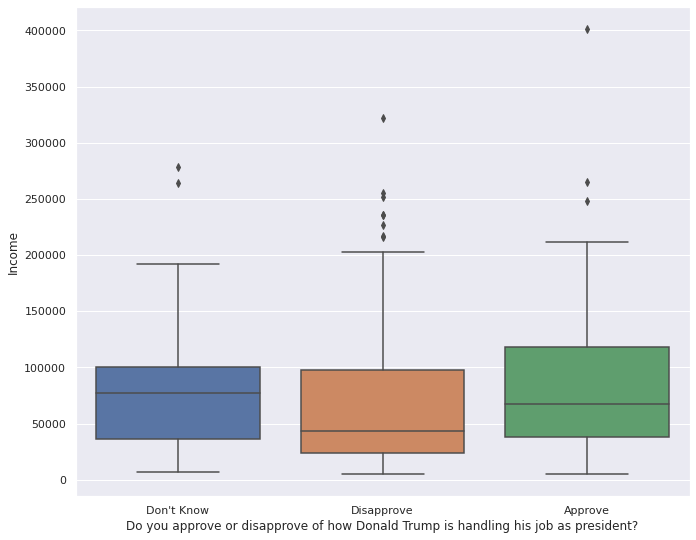

In [ ]:
plt.figure(figsize=(11,9))
sns.boxplot(x=pulse_select_data['Do you approve or disapprove of how Donald Trump is handling his job as president?'],y=pulse_select_data['Income'])

Already in the box plot we. can see a difference in median, but perhaps not in max or min Income values.

Once again, obviously not normally distributed. We'll use Kruskal-Wallis again.

**Kruskal-Wallis and Median Test**

In [ ]:
stats.kruskal(approve['Income'],disapprove['Income'])

KruskalResult(statistic=8.873887035449211, pvalue=0.0028927854464673277)

There might be something here! Let's use a Median Test.

In [ ]:
stats.median_test(approve['Income'],disapprove['Income'])

(7.5903197112268606, 0.005868254155261712, 53000.0, array([[61, 71],
        [40, 97]]))

In [ ]:
print(statistics.median(approve['Income']))
print(statistics.median(disapprove['Income']))

67000.0
43000.0


Indeed, the p-values do indicate that there is a difference between these two groups. Namely, those who approve appear to have a higher median income.

It is clearly visualized in the box plot above that those surveyed who approve in Donald Trump's handling of the presidency have a higher median income than those who don't.

**We reject the null hypothesis, and say that there is a difference in median income between those who approve of Donald Trump's job as president and those who do not. Those who approve of Donald Trump's job as president have a higher median income than those who do not, although the range of incomes is similar, saying that lower and higher income people are in both categories even so.**

I would be curious, however, to also see what percentage of those surveyed who approve of Donald Trump compared to those who disapprove. 

#### **Further Exploration of Income Differences.**

In [ ]:
# Looking at value counts for approval and disapproval.
pulse_select_data['Do you approve or disapprove of how Donald Trump is handling his job as president?'].value_counts()

Disapprove    168
Approve       101
Don't Know     31
Name: Do you approve or disapprove of how Donald Trump is handling his job as president?, dtype: int64

In [ ]:
# Creating a variable for total surveyed
total_surveyed = len(pulse_select_data['Do you approve or disapprove of how Donald Trump is handling his job as president?'])

In [ ]:
# Creating variables for percentages
approve_percent = pulse_select_data['Do you approve or disapprove of how Donald Trump is handling his job as president?'].value_counts()[1] / total_surveyed * 100
disapprove_percent = pulse_select_data['Do you approve or disapprove of how Donald Trump is handling his job as president?'].value_counts()[0] / total_surveyed * 100
dk_percent = pulse_select_data['Do you approve or disapprove of how Donald Trump is handling his job as president?'].value_counts()[2] / total_surveyed * 100

In [ ]:
# Creating a DataFrame with these percentages in order to create a bar graph visualization
approval_df = pd.DataFrame({"Do you approve or disapprove of how Donald Trump is handling his job as president?" :['Disapprove', 'Approve', "Don't Know"], 'Percentage (%)':[disapprove_percent, approve_percent, dk_percent]})

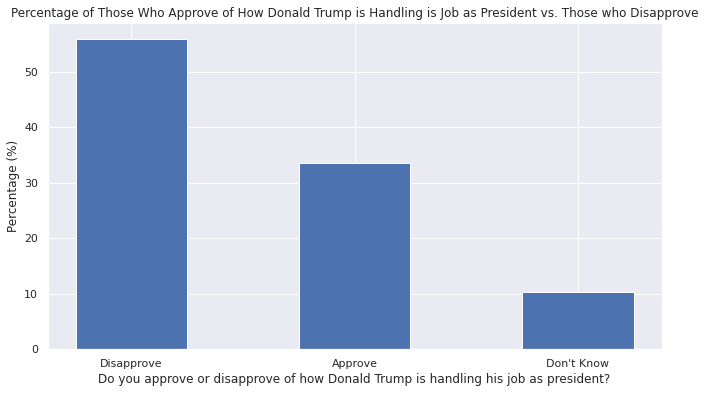

In [ ]:
# Bar Graph for Approval vs. Disapproval
plt.figure(figsize=(11,6))
plt.bar(x="Do you approve or disapprove of how Donald Trump is handling his job as president?", height='Percentage (%)', width=.5, data=approval_df)
plt.xlabel("Do you approve or disapprove of how Donald Trump is handling his job as president?")
plt.ylabel('Percentage (%)')
plt.title('Percentage of Those Who Approve of How Donald Trump is Handling is Job as President vs. Those who Disapprove')
plt.show()

In [ ]:
print(f'Approval Rate of Those Surveyed: {approve_percent.round(2)}%')
print(f'Disapproval Rate of Those Surveyed: {disapprove_percent.round(2)}%')

Approval Rate of Those Surveyed: 33.67%
Disapproval Rate of Those Surveyed: 56.0%


Indeed, FAR more people actually disapprove than approve. I wonder if the higher income level could also be explained by race. Let's look at some what percentages of blacks, latinos, and whites approve of Donald Trump.

In [ ]:
# Creating a pivot table for counts of answers by race. 
approval_by_race = pulse_select_data.pivot_table(columns=pulse_select_data['Do you approve or disapprove of how Donald Trump is handling his job as president?'],index= pulse_select_data['What is your race?'], aggfunc='size')
approval_by_race

Do you approve or disapprove of how Donald Trump is handling his job as president?,Approve,Disapprove,Don't Know
What is your race?,,,
Asian/ other/ no answer,7,12,2
Black,6,40,4
Latino,6,30,5
White,82,86,20


In [ ]:
# Full value counts
pulse_select_data['What is your race?'].value_counts()

White                      188
Black                       50
Latino                      41
Asian/ other/ no answer     21
Name: What is your race?, dtype: int64

In [ ]:
# Creating variables for percentages
black_approval = approval_by_race['Approve']['Black'] / pulse_select_data['What is your race?'].value_counts()[1] *100
latino_approval = approval_by_race['Approve']['Latino'] / pulse_select_data['What is your race?'].value_counts()[2] *100
white_approval = approval_by_race['Approve']['White'] / pulse_select_data['What is your race?'].value_counts()[0] * 100

In [ ]:
# Creating DataFrame for percentages
approval_by_race_df = pd.DataFrame({'Race Self-Identification':['Black', 'Latino', 'White'], 'Percentage (%)':[black_approval, latino_approval, white_approval]})

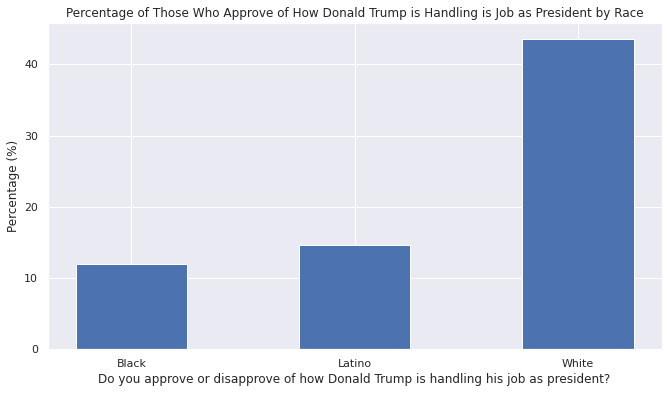

In [ ]:
# Creating bar graph with percentages 
plt.figure(figsize=(11,6))
plt.bar(x='Race Self-Identification', height='Percentage (%)', width=.5, data=approval_by_race_df)
plt.xlabel("Do you approve or disapprove of how Donald Trump is handling his job as president?")
plt.ylabel('Percentage (%)')
plt.title('Percentage of Those Who Approve of How Donald Trump is Handling is Job as President by Race')
plt.show()

In [ ]:
print(f'Black Approval Rating: {black_approval.round(2)}%')
print(f'Latino Approval Rating: {latino_approval.round(2)}%')
print(f'White Approval Rating: {white_approval.round(2)}%')

Black Approval Rating: 12.0%
Latino Approval Rating: 14.63%
White Approval Rating: 43.62%


Indeed, the approval rating for those surveyed who identify as white is MUCH higher than those surveyed who identify as black or latino. 

I'd be very curious to revisualize the box plot of Income Distribution to approval rating with a hue of race self-identification.

Text(0.5, 1.0, "Approval vs. Disapproval of Donald Trump's Job as President Compared to Income")

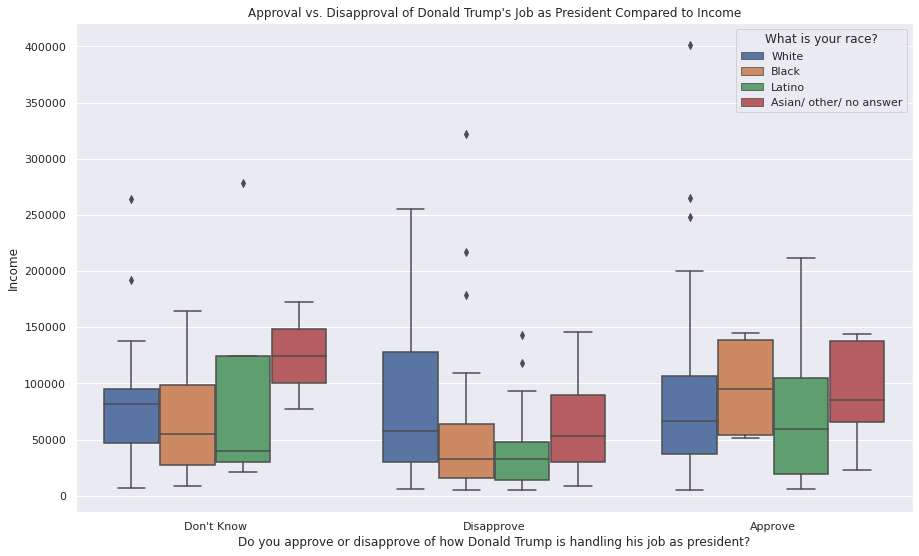

In [ ]:
plt.figure(figsize=(15,9))
sns.boxplot(y = 'Income', x = pulse_select_data['Do you approve or disapprove of how Donald Trump is handling his job as president?'], hue= pulse_select_data['What is your race?'], data = pulse_select_data)
plt.title("Approval vs. Disapproval of Donald Trump's Job as President Compared to Income")

Looking at the 'Approve' section, we see that those with the highest median income are those who self identified as black, or Asian/other/no answer. The highest maximum incomes for this section are for those identified as white or latino.  

Looking at those who 'Disapprove', those who identified as white have a higher median income than black or latino. This aligns with our analysis in comparing income to race self-identification, in that whites surveyed tended to have a higher median income. Additionally, for those identified as white who Disapprove, there is a much higher upper quartile, indicating that those identified as white of many incomes disapprove, so income is not a determining factor of approval or disapproval if you identify as white. 

Looking at those who Approve is more interesting. Of those who approve, the higher median income is of those who self-identified as black, asian, or other, and those who self identified as black who approve have a significantly higher median income than those who disapprove and self-identified as black. This is in line with the overall trend that those who approve of Trumps job in the presidency have a higher income. A similar observation is true for those who self-identify as Latino as well. There is a higher median income for those who approve, although the minimum income is about the same for latinos who approve or don't approve of Trump's job as president, which is not the case for those who self identify as black. 

*We can perhaps say that if you self-identify as black or latino, that income is one of the major factors in whether or not you approve or disapprove of Trumps job as president.*

There doesn't seem to be too much of a difference in median income between whites who disapprove or approve of Trump's job as president, so we could say that income is not as much of a factor here and *we'd have to examine other factors besides income in why one who self-identifies as white does or does not support Trump's job as president.*

#### **Age**

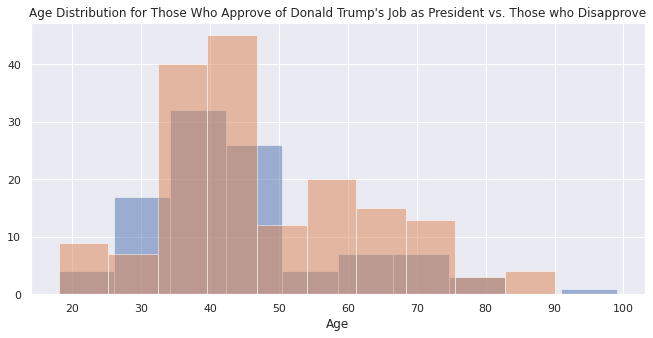

In [ ]:
plt.figure(figsize=(11,5))
plt.hist(approve['Age'], alpha = .5)
plt.hist(disapprove['Age'], alpha = .5)
plt.xlabel('Age')
plt.title("Age Distribution for Those Who Approve of Donald Trump's Job as President vs. Those who Disapprove")
plt.show()

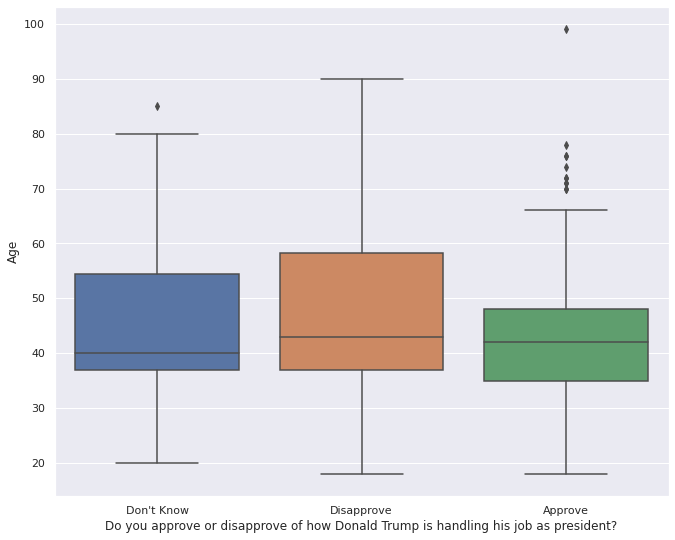

In [ ]:
plt.figure(figsize=(11,9))
sns.boxplot(x=pulse_select_data['Do you approve or disapprove of how Donald Trump is handling his job as president?'],y=pulse_select_data['Age'])

Not too much interesting stands out just by looking at the box plot here, the medians look about the same, though the upper two quartiles for Disapprove are much larger than approve, suggesting that perhaps folks who are slightly older are more likely to disapprove of Trump's job in office. 

Let's see if these distributions are normal or not.

In [ ]:
print(stats.describe(approve['Age']))
print(stats.describe(disapprove['Age']))

DescribeResult(nobs=101, minmax=(18, 99), mean=44.64356435643565, variance=207.65168316831682, skewness=1.0941590880454144, kurtosis=1.3733293916984186)
DescribeResult(nobs=168, minmax=(18, 90), mean=47.44047619047619, variance=228.7269746221842, skewness=0.5341825708267323, kurtosis=-0.28586049222387633)


Based on skewness and kurtosis values, these could be normal. Let's examine further with Shapiro-Wilks.

In [ ]:
print(stats.shapiro(approve['Age']))
print(stats.shapiro(disapprove['Age']))

(0.9092875719070435, 3.6015753721585497e-06)
(0.9527550339698792, 1.989990232686978e-05)


We can say within a 95% confidence interval that these distributions are non-normal. Let's use a non-parametric test to compare these two independent groups: Kruskal-Wallis and Median Test, if necessary.

**Kruskal-Wallis**

In [ ]:
stats.kruskal(approve['Age'],disapprove['Age'])

KruskalResult(statistic=2.2977626480510684, pvalue=0.12956050380860587)

Our p-value is higher than 0.05, therefore there is not sufficent evidence to conclude that there is any meaningful difference in age between those surveyed who approve of Trump's job in office vs. those who don't. 

**We fail to reject our null hypothesis that there is any difference in age between those surveyed who approve of Trump's job in office vs. those who don't.**

### 5. Are there notable differences in income or age between those surveyed who identify as republican and those surveyed who identify as democrats, and those who identify as Indpendent/Undecided?

#### **Separating the Data into Groups**

In [ ]:
republicans = pulse_select_data[pulse_select_data['Political Affiliation '] == 'Republican']
democrats = pulse_select_data[pulse_select_data['Political Affiliation '] == 'Democrat']
indorund = pulse_select_data[pulse_select_data['Political Affiliation '] == 'Independent/Undecided']
notrepublican = pulse_select_data[pulse_select_data['Political Affiliation '] != 'Republican']

Let's take a brief look as some statistical descriptions for these groups.

In [ ]:
republicans.describe()

,Income,Age
count,62.000000,62.000000
mean,94225.806452,45.274194
std,70627.728580,13.587807
min,7000.000000,18.000000
25%,41500.000000,36.250000
50%,77500.000000,42.000000
75%,131500.000000,51.500000
max,401000.000000,76.000000


In [ ]:
democrats.describe()

,Income,Age
count,108.000000,108.000000
mean,77490.740741,48.759259
std,67729.187978,14.346103
min,5000.000000,19.000000
25%,29500.000000,38.000000
50%,54000.000000,44.000000
75%,106750.000000,59.500000
max,322000.000000,83.000000


In [ ]:
indorund.describe()

,Income,Age
count,130.000000,130.000000
mean,63092.307692,44.823077
std,53632.606962,16.018142
min,5000.000000,18.000000
25%,24000.000000,35.000000
50%,46000.000000,40.500000
75%,89000.000000,53.750000
max,264000.000000,99.000000


There are more democrats surveyed than republicans, maybe republicans were less likely to not hang up the phone, who knows. Also more independents/undecideds than either democrats or republicans. Mean age looks pretty similar in all three groups but it does look like there might be some differences in average income. Let's explore more. 

#### **Income**

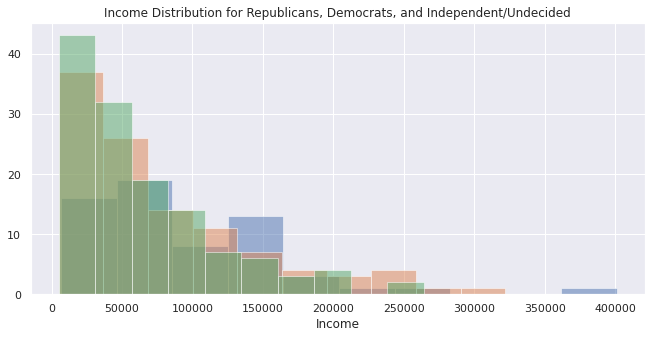

In [ ]:
plt.figure(figsize=(11,5))
plt.hist(republicans['Income'], alpha = .5)
plt.hist(democrats['Income'], alpha = .5)
plt.hist(indorund['Income'], alpha = .5)
plt.xlabel('Income')
plt.title('Income Distribution for Republicans, Democrats, and Independent/Undecided')
plt.show()

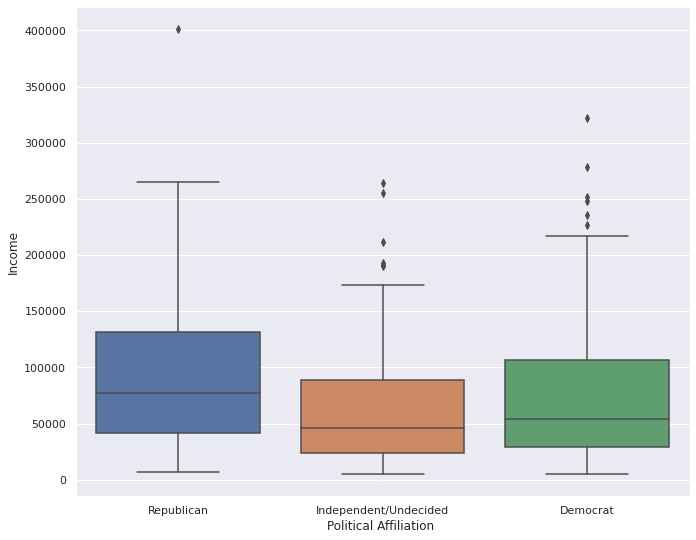

In [ ]:
plt.figure(figsize=(11,9))
sns.boxplot(x=pulse_select_data['Political Affiliation '],y=pulse_select_data['Income'])

Just on initial inspection, we see that there may be a big difference between median and max income for republicans and democrats or independents.

Here we are now comparing more than two independent groups. This may change the statistical test used for normal distributions, it does not for this non-normal distribution. We will still compare these groups using Kruskal-Wallis and if necessary, Mood's Median Test.

**Kruskal-Wallis**

In [ ]:
stats.kruskal(republicans['Income'],democrats['Income'],indorund['Income'])

KruskalResult(statistic=11.556709439625847, pvalue=0.0030938013932893882)

Based on the p-value = 0.003 < 0.05, tehre may be a difference between these three groups! Let's use Mood's Median Test to explore more.

In [ ]:
stats.median_test(republicans['Income'],democrats['Income'],indorund['Income'])

(9.552664246707995, 0.00842685100216441, 55000.0, array([[41, 53, 55],
        [21, 55, 75]]))

In [ ]:
print(f"Median Income of Republicans: ${statistics.median(republicans['Income'])}0")
print(f"Median Income of Democrats: ${statistics.median(democrats['Income'])}0")
print(f"Median Income of Independents/Undecided: ${statistics.median(indorund['Income'])}0")

Median Income of Republicans: $77500.00
Median Income of Democrats: $54000.00
Median Income of Independents/Undecided: $46000.00


Indeed! It appears there may be something here! It appears that there is a difference between income distribution for the three groups. Republicans seem to have a higher median income than Democrats and those who are Independent/Undecided.

**Let's examine differences between each group and the other two.** 

In [ ]:
# Democrats and Independents
print(stats.kruskal(democrats['Income'],indorund['Income']))
print(stats.median_test(democrats['Income'],indorund['Income']))

KruskalResult(statistic=2.014564737870596, pvalue=0.15579594288189652)
(0.8306267806267806, 0.3620913514634365, 49500.0, array([[58, 61],
       [50, 69]]))


In [ ]:
# Democrats and Republicans
print(stats.kruskal(democrats['Income'],republicans['Income']))
print(stats.median_test(democrats['Income'],republicans['Income']))

KruskalResult(statistic=4.239811160516665, pvalue=0.03948655881038852)
(3.071983273596177, 0.0796522427139412, 62500.0, array([[48, 37],
       [60, 25]]))


In [ ]:
# Republicans and Independents
print(stats.kruskal(republicans['Income'],indorund['Income']))
print(stats.median_test(republicans['Income'],indorund['Income']))

KruskalResult(statistic=11.777312342873635, pvalue=0.0005995698785574575)
(8.599503722084368, 0.0033625462090077583, 55500.0, array([[41, 55],
       [21, 75]]))


It appears the the largest, and only statistically significant income difference is mostly between republicans and independent/undecided. 

Let's see if theres a statistical difference between the groups "republican" and "not republican", including both democrats and independents.

In [ ]:
print(stats.kruskal(republicans['Income'],notrepublican['Income']))
print(stats.median_test(republicans['Income'],notrepublican['Income']))

KruskalResult(statistic=9.46410239060116, pvalue=0.002095319388421729)
(7.6625290451449946, 0.005637941978832429, 55000.0, array([[ 41, 108],
       [ 21, 130]]))


In [ ]:
print(statistics.median(republicans['Income']))
print(statistics.median(notrepublican['Income']))

77500.0
49500.0


There does appear to be a statistical difference here. We'll say, then that in general, republicans have a higher median income than those who are not republican. 

**We therefore reject the null hypothesis that there is no difference in Income levels for different Political Affiliations. Those who identify as Republican will have a higher median income than those who do not identify as Republicans.**

#### **Further Exploration of Income Differences**

I'm interested in how many Republicans approve or disapprove of Trump, as well as how many Democrats, and perhaps also their income distributions. Let's look

In [ ]:
approval_by_politics = pulse_select_data.pivot_table(columns=pulse_select_data['Do you approve or disapprove of how Donald Trump is handling his job as president?'],index= pulse_select_data['Political Affiliation '], aggfunc='size')
approval_by_politics

Do you approve or disapprove of how Donald Trump is handling his job as president?,Approve,Disapprove,Don't Know
Political Affiliation,,,
Democrat,13,89,6
Independent/Undecided,39,71,20
Republican,49,8,5


Upon initial inspection, it's as we might expect, that more democrats disapprove than approve, more republicans approve than disapprove, but also it's interesting that more of those surveyed who are independent/undecided disapprove versus approve. 

Let's visualize this. 

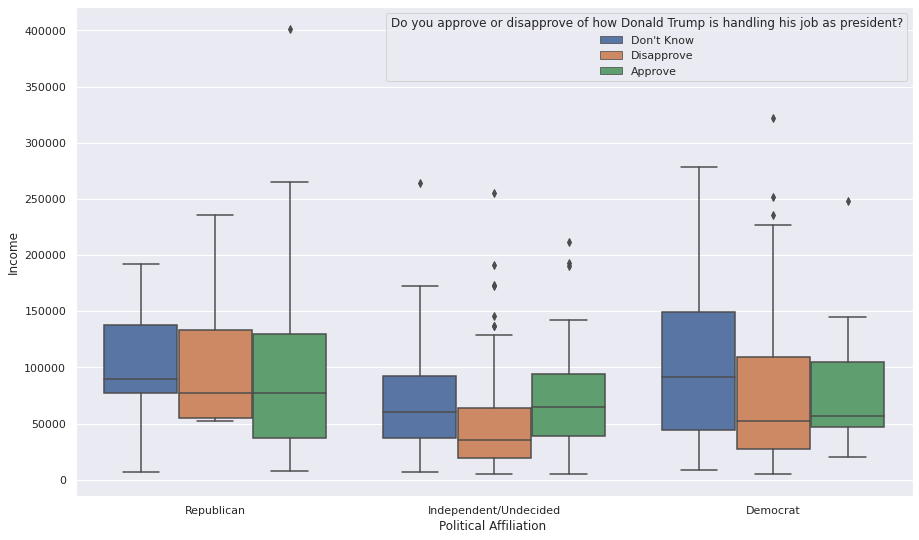

In [ ]:
plt.figure(figsize=(15,9))
sns.boxplot(x=pulse_select_data['Political Affiliation '],y=pulse_select_data['Income'],hue=pulse_select_data['Do you approve or disapprove of how Donald Trump is handling his job as president?'],data=pulse_select_data)

To me the only truly interesting thing to explore here is the difference in income between independents who approve and those who disapprove. There doesn't seem to be any interesting difference between the income of democrats who approve vs disapprove or the income of republicans who approve vs. disapprove. 

In [ ]:
indorund_approve = indorund[indorund['Do you approve or disapprove of how Donald Trump is handling his job as president?'] == 'Approve']
indorund_disapprove = indorund[indorund['Do you approve or disapprove of how Donald Trump is handling his job as president?'] == 'Disapprove']

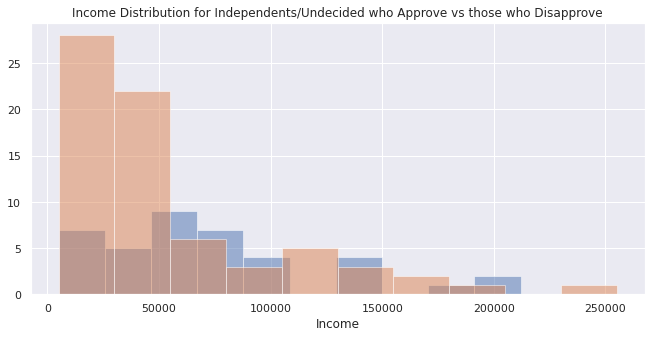

In [ ]:
plt.figure(figsize=(11,5))
plt.hist(indorund_approve['Income'], alpha = .5)
plt.hist(indorund_disapprove['Income'], alpha = .5)
plt.xlabel('Income')
plt.title('Income Distribution for Independents/Undecided who Approve vs those who Disapprove')
plt.show()

Text(0.5, 1.0, 'Approval vs Disapproval Compared with Income for Survey Participants who Identify as Independent/Undecided')

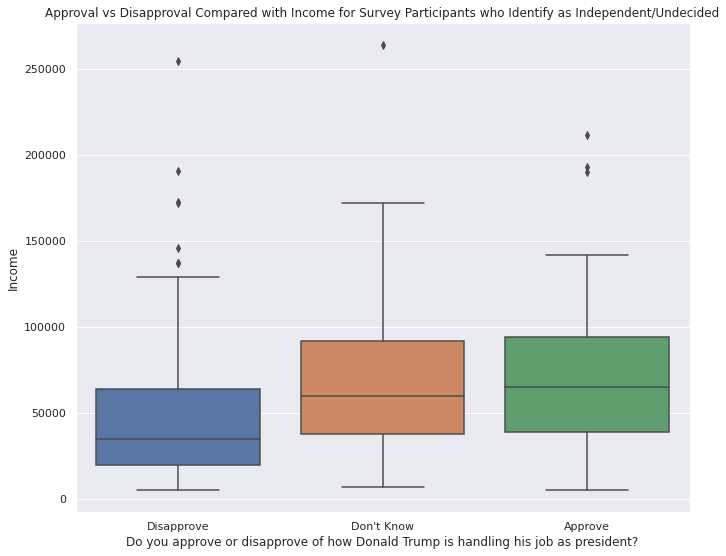

In [ ]:
plt.figure(figsize=(11,9))
sns.boxplot(x=indorund['Do you approve or disapprove of how Donald Trump is handling his job as president?'],y=indorund['Income'])
plt.title('Approval vs Disapproval Compared with Income for Survey Participants who Identify as Independent/Undecided')

In [ ]:
print(stats.kruskal(indorund_approve['Income'], indorund_disapprove['Income']))
print(stats.median_test(indorund_approve['Income'], indorund_disapprove['Income']))

KruskalResult(statistic=7.053858531275056, pvalue=0.007909469370186857)
(10.169736366919464, 0.0014276468773379836, 42500.0, array([[28, 27],
       [11, 44]]))


In [ ]:
print(statistics.median(indorund['Income']))
print(statistics.median(indorund_approve['Income']))
print(statistics.median(indorund_disapprove['Income']))

46000.0
65000.0
35000.0


In [ ]:
print(f"Median Income of Independent/Undecided Survey Participants who Approve of Trumps Job in the Presidency: ${statistics.median(indorund_approve['Income'])}0")
print(f"Median Income of Independent/Undecided Survey Participants who Dispprove of Trumps Job in the Presidency: ${statistics.median(indorund_disapprove['Income'])}0")

Median Income of Independent/Undecided Survey Participants who Approve of Trumps Job in the Presidency: $65000.00
Median Income of Independent/Undecided Survey Participants who Dispprove of Trumps Job in the Presidency: $35000.00


In [ ]:
pulse_select_data['Political Affiliation '].value_counts()

Independent/Undecided    130
Democrat                 108
Republican                62
Name: Political Affiliation , dtype: int64

In [ ]:
indorund_approval_perc = approval_by_politics['Approve']['Independent/Undecided'] / pulse_select_data['Political Affiliation '].value_counts()[0] *100
print(f'{indorund_approval_perc}% of Survey Participants who are Independent/Undecided Approve of Trump')

30.0% of Survey Participants who are Independent/Undecided Approve of Trump


Indeed, both the Kruskal-Wallis Test and the Median Test indicate that there is a notable difference between income of those who's political afficaliation independent/undecided who approve of Trump's job in office and those who disapprove, even though there are more independents who disapprove of Trump's job in office. 

In fact, only 30% of survey participants who are independent/undecided actually approve of Trump, but of those 30% their median income is a full $30,000 higher than those who disapprove. It appears that one of the major factors of approving or disapproving of Trump's job in office, beyond political affiliation, which is to be expected, may in fact be income. 

#### **Age**

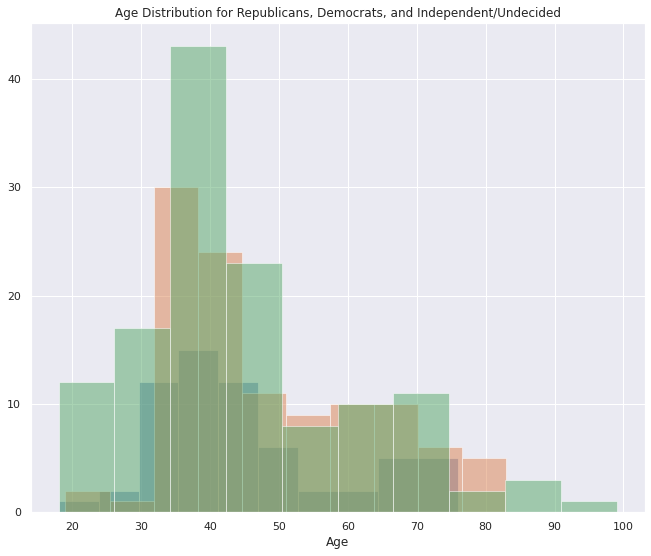

In [ ]:
plt.figure(figsize=(11,9))
plt.hist(republicans['Age'], alpha = .5)
plt.hist(democrats['Age'], alpha = .5)
plt.hist(indorund['Age'], alpha = .5)
plt.xlabel('Age')
plt.title('Age Distribution for Republicans, Democrats, and Independent/Undecided')
plt.show()

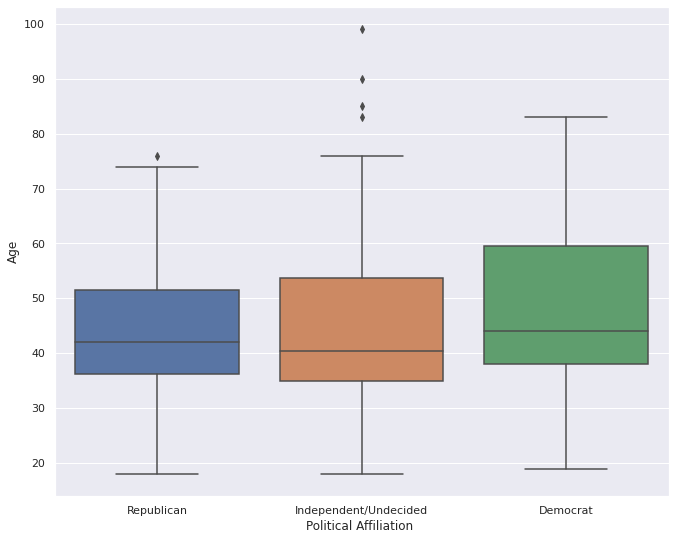

In [ ]:
plt.figure(figsize=(11,9))
sns.boxplot(x=pulse_select_data['Political Affiliation '], y=pulse_select_data['Age'])

The box plot doesn't initally appear super interesting.

These may be normally distributed, let's check. 

In [ ]:
print(stats.describe(republicans['Age']))
print(stats.describe(democrats['Age']))
print(stats.describe(indorund['Age']))

DescribeResult(nobs=62, minmax=(18, 76), mean=45.274193548387096, variance=184.62850343733473, skewness=0.7701462422788952, kurtosis=-0.2280606114806778)
DescribeResult(nobs=108, minmax=(19, 83), mean=48.75925925925926, variance=205.81066112841816, skewness=0.6381161803616187, kurtosis=-0.37465678620403287)
DescribeResult(nobs=130, minmax=(18, 99), mean=44.823076923076925, variance=256.5808586762075, skewness=0.8867902223393705, kurtosis=0.6098704907901875)


Values for skewness and kurtosis indicate possible normal distribution. Let's check with Shapiro Wilks.

In [ ]:
print(stats.shapiro(republicans['Age']))
print(stats.shapiro(democrats['Age']))
print(stats.shapiro(indorund['Age']))

(0.9107931852340698, 0.00026387826073914766)
(0.93317711353302, 3.9387447031913325e-05)
(0.9284147620201111, 3.4820789096556837e-06)


It appears that all of these results of the Shapiro-Wilks test indicate that these distrubtions are non-normally distributed within a 95% confidence level. We will use the Kruskal-Wallis test to compare, and if necessary, the Median Test.

**Kruskal-Wallis and Median Test**

In [ ]:
stats.kruskal(republicans['Age'], democrats['Age'], indorund['Age'])

KruskalResult(statistic=5.7640338515732745, pvalue=0.05602165728453926)

Our test statistic is hovering right above 0.05, let's do a median test just to see what turns up there.

In [ ]:
stats.median_test(republicans['Age'],democrats['Age'],indorund['Age'])

(2.4801130523622774, 0.28936786061664155, 42.0, array([[29, 59, 58],
        [33, 49, 72]]))

The p-value here is even higher. 

**Therefore, we fail to reject the null hypothesis that there is any difference of age between the Political Affiliations of those surveyed.**

### 6. Have you ever eaten a kale salad?

#### **Separating the Data into Groups**

In [ ]:
yes_kale = pulse_select_data[pulse_select_data['Have you ever eaten a kale salad?'] == 'Yes']
no_kale = pulse_select_data[pulse_select_data['Have you ever eaten a kale salad?'] == 'No']

In [ ]:
yes_kale.describe()

,Income,Age
count,136.000000,136.000000
mean,93095.588235,44.316176
std,67464.545276,13.050728
min,6000.000000,18.000000
25%,40750.000000,37.000000
50%,79500.000000,42.000000
75%,130500.000000,47.000000
max,322000.000000,99.000000


In [ ]:
no_kale.describe()

,Income,Age
count,151.000000,151.000000
mean,57079.470199,47.172185
std,49483.266287,15.915930
min,5000.000000,18.000000
25%,23500.000000,35.000000
50%,42000.000000,43.000000
75%,77000.000000,59.000000
max,264000.000000,90.000000


A closer to equal amount of people here have or haven't eaten a kale salad, and upon intial inspection, the mean income for those who have eaten a kale salad is much higher. I'm interested to see what this data shows.

#### **Income**

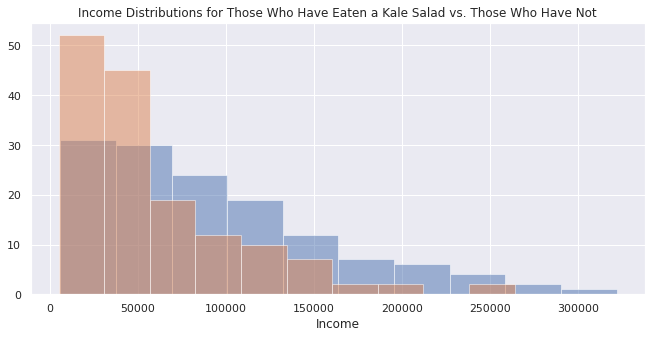

In [ ]:
plt.figure(figsize=(11,5))
plt.hist(yes_kale['Income'], alpha = .5)
plt.hist(no_kale['Income'], alpha = .5)
plt.xlabel('Income')
plt.title('Income Distributions for Those Who Have Eaten a Kale Salad vs. Those Who Have Not')
plt.show()

Text(0.5, 1.0, 'Differences in Income for Those Who Have Eaten a Kale Salad and Those Who Have Not')

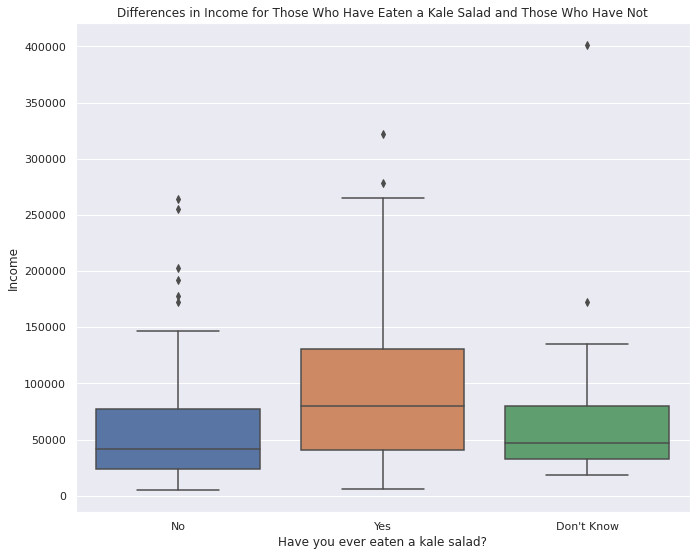

In [ ]:
plt.figure(figsize=(11,9))
sns.boxplot(y = 'Income', x = pulse_select_data['Have you ever eaten a kale salad?'], data = pulse_select_data)
plt.title('Differences in Income for Those Who Have Eaten a Kale Salad and Those Who Have Not')

This boxplot clearly shows initially that those who have eaten a kale salad have a much higher median and max income than those who hae not, although there are outliers for income for not having eaten one, and the minimum income in either case is about the same. So it does appear that income may be a determining factor in whether someone has eaten a kale salad or not, but not the only factor. 

It's clear that these distributions are non-normal.

**Kruskal-Wallis and Median Test**

In [ ]:
stats.kruskal(yes_kale['Income'],no_kale['Income'])

KruskalResult(statistic=25.573147021650993, pvalue=4.2592574854651e-07)

Our Test Statistic is the highest its been yet, and our p-value the lowest its been yet. Let's Apply a Median Test as well. 

In [ ]:
stats.median_test(yes_kale['Income'],no_kale['Income'])

(24.03922085030183, 9.439320754828844e-07, 55000.0, array([[89, 54],
        [47, 97]]))

Indeed, here as well, our p-value is extremely low.

In [ ]:
print(f"The median income for those who have eaten a kale salad is ${statistics.median(yes_kale['Income'])}0")
print(f"The median income for those who have not eaten a kale salad is ${statistics.median(no_kale['Income'])}0")

The median income for those who have eaten a kale salad is $79500.00
The median income for those who have not eaten a kale salad is $42000.00


Interestingly enough, of all the analysis, having eaten a kale salad demonstrates the largest difference in income yet.

**We can therefore reject the null hypothesis that there is no difference in income between those who have eaten a kale salad and those who have not. We can refer to our alternative hypothesis that there is a difference, and a fairly large one at that. Those who have eaten a kale salad have a much higher median income than those who have not eaten a kale salad.**

#### **Age**

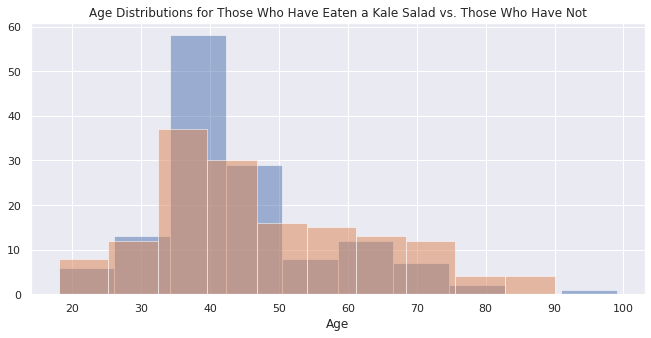

In [ ]:
plt.figure(figsize=(11,5))
plt.hist(yes_kale['Age'], alpha = .5)
plt.hist(no_kale['Age'], alpha = .5)
plt.xlabel('Age')
plt.title('Age Distributions for Those Who Have Eaten a Kale Salad vs. Those Who Have Not')
plt.show()

Text(0.5, 1.0, 'Differences in Age for Those Who Have Eaten a Kale Salad and Those Who Have Not')

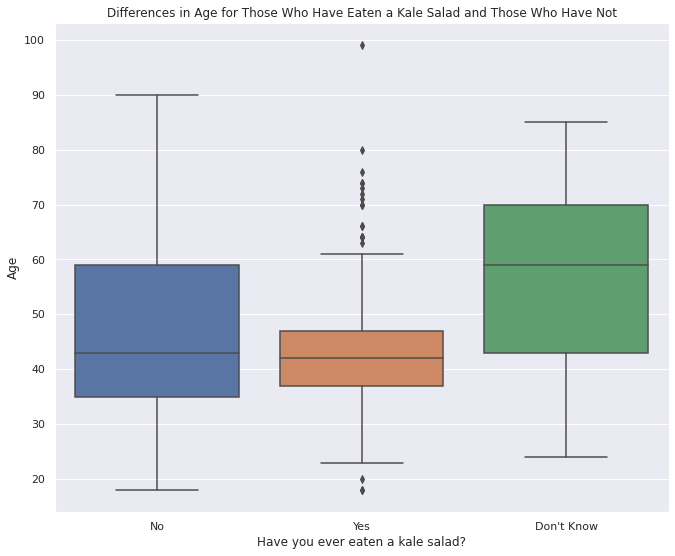

In [ ]:
plt.figure(figsize=(11,9))
sns.boxplot(y = 'Age', x = pulse_select_data['Have you ever eaten a kale salad?'], data = pulse_select_data)
plt.title('Differences in Age for Those Who Have Eaten a Kale Salad and Those Who Have Not')

Testing for Normality:

In [ ]:
print(stats.describe(yes_kale['Age']))
print(stats.describe(no_kale['Age']))

DescribeResult(nobs=136, minmax=(18, 99), mean=44.31617647058823, variance=170.32151416122005, skewness=1.2041217279726417, kurtosis=2.051012987575711)
DescribeResult(nobs=151, minmax=(18, 90), mean=47.17218543046358, variance=253.31682119205294, skewness=0.5169509329781353, kurtosis=-0.44551074227511256)


In [ ]:
print(stats.shapiro(yes_kale['Age']))
print(stats.shapiro(no_kale['Age']))

(0.8932148814201355, 1.9632045322737213e-08)
(0.9545847177505493, 7.584392733406276e-05)


Based on these p-values, it's clear that thes distributions are non-normal. We'll use a non-parametric test to compare.

**Kruskal-Wallis**

In [ ]:
stats.kruskal(yes_kale['Age'],no_kale['Age'])

KruskalResult(statistic=1.1750966986509948, pvalue=0.2783564755995678)

The p-value given by the Kruskal-Wallis Test is much higher than 0.27.

**We therefore fail to reject the null hypothesis that there is no difference in age for those who have eaten a kale salad and those who have not.**

# Conclusions

#### **Most Interesting Results:**


*   **No matter which research question, there is not enough evidence to say that there age will be a determining factor in ones opinion.** 

*   **Those who believe that all whites in the US are racist have a lower median income (43,500 USD) than those who do not believe all whites in the US are racist (57,000 USD).**
    - This may have to do with the fact that a higher percentage of those surveyed who are black or latino believe that most whites in the US are racist, and those identified as white have a statistically significant higher median income (62,500 USD) than those who identified as other than white (40,000 USD).
    - Specifically, 28.0% of those who identify as black believe all whites in the US are racist, 29.27% of those who identify as latino believe all whites in the US are racist, while only 12.23% of those who identify as white believe all whites in the US are racist.

*   **Those who approve of Trump's handling of his job as president have a higher median income (67,000 USD) than those who disapprove (43,000 USD), although only 33.67% of those surveyed that they approve.**
    - This may also be explained by income differences between those who identified as white and those who identified as not white. Only 12.0% of those who identified as black approve, and 14.63% of those who identified as latino approved, while 43.62% of those who identified as whites approved. As those who identify as white have a higher median income, that may inform this difference of income.
    - If you self-identify as white in this survey, there doesn't seem to be much of a difference between the median income of those who approve or disapprove, though for whites who Disapprove, there is a much higher upper quartile, indicating that those identified as white of many incomes disapprove, so income is not a determining factor of approval or disapproval if you identify as white.
    - For those who identify as black, those who approve have a higher minimum, median, and maximum income than those who dissapprove. So it seems if one self-identifies as black, income may be a determining factor in whether or not you approve or disapprove of Trump's job as president.
    - For those who identify as lationo, those who approve have a higher median and much higher maximum and upper quuartile of incomes than those who approve, though a similar minimum income. So again, it seems if one self-identifies as latino, income may be a determining factor in whether or not one approves or disapproves of Trump's job as president. 

*   **Those who identified as Republican have a higher median income (77,500 USD) than those who identified as not Republican (49,500 USD), with the biggest difference being between those who identify as Republican and those who identify as Independent/Undecided (with a median income of 46,000 USD).**
    - There is not much of a difference between median incomes for Republicans who approve and Republicans who disapprove. The same is the case for Democrats.
    - For those who are Independent/Undecided however, there does appear to be a statistially significant difference between Income of those who approve of Donald Trump's job as president (65,000 USD) and those who do not (35,000 USD). This is interesting as only 30.0% of those surveyed who are Independent/Undecided actually do say that they approve. 

*   **Perhaps the most stark differences in income that are statistically significant is in whether or not those surveyed have ever eaten a kale salad. The median income for those who have eaten a kale salad is 79,500 USD, and the median income for those who have not is 42,000 USD.** 
    - For those who have not eaten a kale salad, there exist outliers with a very high income, and the minimum income in either case is about the same. So it does appear that income may be a determining factor in whether someone has eaten a kale salad or not, but not the only factor. 










#### **So why is all this important?**


**Funding Choices**
First and foremost, anyone who has ever been involved in a political campaign, or really any business in general, knows that the dollars are precious. Inefficient or incorrect funding choices could be the difference between winning an election and not winning an election. Knowing the income of the demographics you are trying to reach and elicit campaign donations from can help inform which groups you focus on in allocating funding, which groups are more likely to engage, and to what messaging. 


**Campaign Messaging Based on Demographics of Support Groups**

This study and others like it can help illuminate which demographics (either divided by race, income, or even kale salad consumption) tend to approve or disapprove of the current president's job in office, one's belief on the racism and the politics surrounding it, which can inform not only which demographics to target and how, but what messaging to instill in those campaign initiatives that will help the campaign better connect with potential voters and speak to the issues that interest them. 

**The campaign managers and marketing team should review this inforation from their platform of expertise, and conduct their messaging based on the insights provided by this resarch study as well as more research studies to follow**

#### **Next Steps**

The never-ending question: What next? 

**More data needs to be taken in general, from more people, in more places.** In order to expand this data, by far more and more voters in the US need to be surveyed.

**More recent data needs to be taken**. Considering this data is from as far back as October 2017 (now eons, especially in the context of 2020, a global pandemic and the largest civil rights movements the US has seen since the era of Martin Luther King Jr., I'd be curious to see how the ethos of American voters is shifting, most likely in increasingly opposite directions. 

**More data from higher income earners needs to be taken**. The highest income of those surveyed here is ~400,000 USD, which although it is almost in the 99th percentile of earners in the United States, there are still 19 million people who make much more, and exponentially more, and it'd be interestingto see how that much different of an income changes ones political views. 

**More culturally minded questions need to be asked**. Questions like "have you ever eaten a kale salad" may seem frivolous, but understanding the culture differences between demographics helps to address these demographics more effectively. 